# 基于卷积神经网络的手写英文字母识别系统研究

In [1]:
from myCnn.cnnWithAttention.utils import *
from myCnn.cnnWithAttention.attentionStructure import *
from myCnn.cnnWithAttention.train_my_cnn import *
import matplotlib.pyplot as plt

## 基本参数设置

In [8]:
ROOT_DIR = "emnist_png_balanced"  # 数据集路径
BATCH_SIZE = 256  # 批大小
EPOCH = 500  # 训练轮数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# 设备选择
LR = 1e-4  # 学习率

### 创建数据集

In [9]:
save_emnist_images_with_class_previews(Edataset = "balanced",
                                       save_dir = ROOT_DIR, 
                                       max_images_per_class = 1000, 
                                       preview=True, 
                                       preview_limit_per_class=10)

目录 emnist_png_balanced 不存在，开始下载数据并保存...
已保存 500 张图像...
已保存 1000 张图像...
已保存 1500 张图像...
已保存 2000 张图像...
已保存 2500 张图像...
已保存 3000 张图像...
已保存 3500 张图像...
已保存 4000 张图像...
已保存 4500 张图像...
已保存 5000 张图像...
已保存 5500 张图像...
已保存 6000 张图像...
已保存 6500 张图像...
已保存 7000 张图像...
已保存 7500 张图像...
已保存 8000 张图像...
已保存 8500 张图像...
已保存 9000 张图像...
已保存 9500 张图像...
已保存 10000 张图像...
已保存 10500 张图像...
已保存 11000 张图像...
已保存 11500 张图像...
已保存 12000 张图像...
已保存 12500 张图像...
已保存 13000 张图像...
已保存 13500 张图像...
已保存 14000 张图像...
已保存 14500 张图像...
已保存 15000 张图像...
已保存 15500 张图像...
已保存 16000 张图像...
已保存 16500 张图像...
已保存 17000 张图像...
已保存 17500 张图像...
已保存 18000 张图像...
已保存 18500 张图像...
已保存 19000 张图像...
已保存 19500 张图像...
已保存 20000 张图像...
已保存 20500 张图像...
已保存 21000 张图像...
已保存 21500 张图像...
已保存 22000 张图像...
已保存 22500 张图像...
已保存 23000 张图像...
已保存 23500 张图像...
已保存 24000 张图像...
已保存 24500 张图像...
已保存 25000 张图像...
已保存 25500 张图像...
已保存 26000 张图像...
已保存 26500 张图像...
已保存 27000 张图像...
已保存 27500 张图像...
已保存 28000 张图像...
已保存 28500 张图像...
已保存 29000 张

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\computational_intelligence\\Com_Intelligent_work\\result\\A_preview.png'

### 加入数据增强

训练集每个类别样本数：
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150

测试集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150


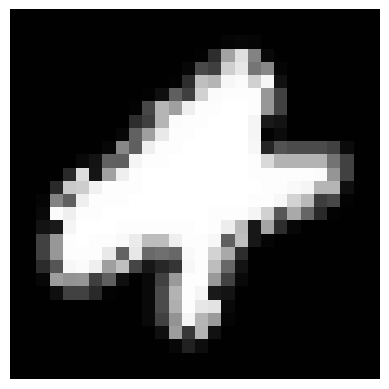

In [37]:
transform = AlbumentationsTransform()  # 使用数据增强

train_loader, val_loader, test_loader1, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader1.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

CNNModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (MaxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5):

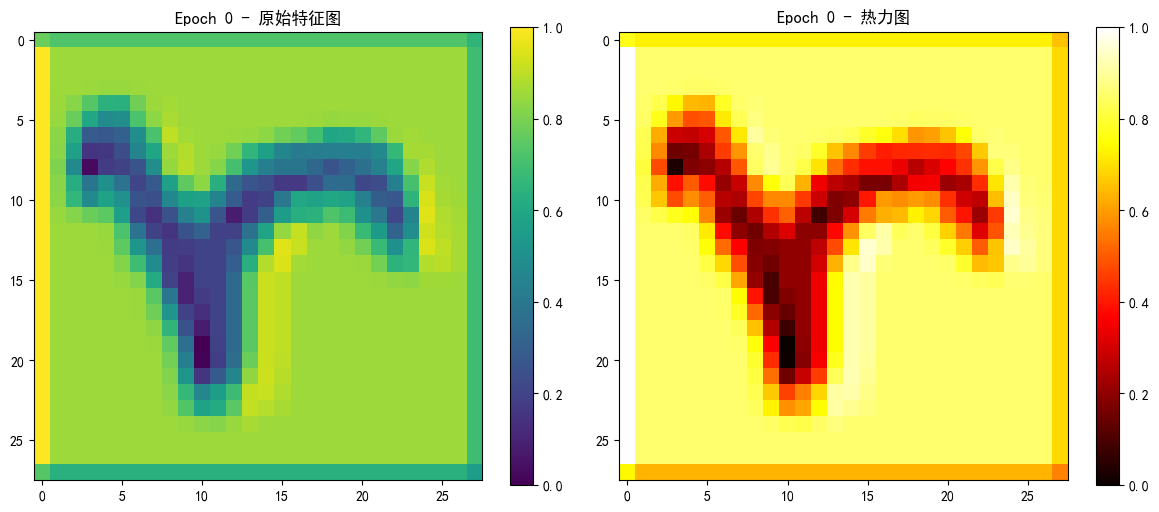

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_0.png
🎯 新最佳模型 (准确率: 0.2744) 已保存到 cnn_res_attention_aug_best.pth
Epoch 1/500: Train Loss: 3.4813 | Val Loss: 3.2183 | Train Top-1: 0.0865 | Val Top-1: 0.2744 | Train Top-3: 0.2053 | Val Top-3: 0.4984
🎯 新最佳模型 (准确率: 0.4070) 已保存到 cnn_res_attention_aug_best.pth
Epoch 2/500: Train Loss: 3.0857 | Val Loss: 2.8342 | Train Top-1: 0.2297 | Val Top-1: 0.4070 | Train Top-3: 0.4476 | Val Top-3: 0.6659
🎯 新最佳模型 (准确率: 0.4975) 已保存到 cnn_res_attention_aug_best.pth
Epoch 3/500: Train Loss: 2.7071 | Val Loss: 2.4809 | Train Top-1: 0.3736 | Val Top-1: 0.4975 | Train Top-3: 0.6339 | Val Top-3: 0.7467
🎯 新最佳模型 (准确率: 0.5771) 已保存到 cnn_res_attention_aug_best.pth
Epoch 4/500: Train Loss: 2.3687 | Val Loss: 2.1914 | Train Top-1: 0.4952 | Val Top-1: 0.5771 | Train Top-3: 0.7475 | Val Top-3: 0.8108
🎯 新最佳模型 (准确率: 0.6539) 已保存到 cnn_res_attention_aug_best.pth
Epoch 5/500: Train Loss: 2.0743 | Val Loss: 1.8713 | Train Top-1: 0.5763 | Val Top-1: 0.6539 | Train Top-3: 0.821

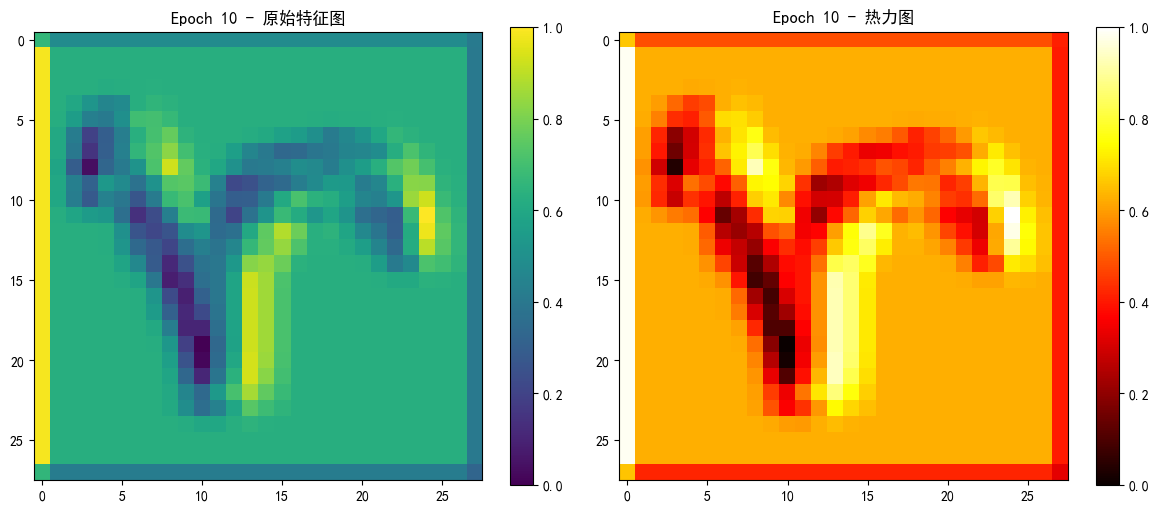

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_10.png
🎯 新最佳模型 (准确率: 0.8308) 已保存到 cnn_res_attention_aug_best.pth
Epoch 11/500: Train Loss: 0.9887 | Val Loss: 0.8642 | Train Top-1: 0.7956 | Val Top-1: 0.8308 | Train Top-3: 0.9441 | Val Top-3: 0.9537
🎯 新最佳模型 (准确率: 0.8472) 已保存到 cnn_res_attention_aug_best.pth
Epoch 12/500: Train Loss: 0.8952 | Val Loss: 0.7798 | Train Top-1: 0.8079 | Val Top-1: 0.8472 | Train Top-3: 0.9513 | Val Top-3: 0.9580
Epoch 13/500: Train Loss: 0.8126 | Val Loss: 0.7608 | Train Top-1: 0.8182 | Val Top-1: 0.8386 | Train Top-3: 0.9551 | Val Top-3: 0.9616
🎯 新最佳模型 (准确率: 0.8508) 已保存到 cnn_res_attention_aug_best.pth
Epoch 14/500: Train Loss: 0.7550 | Val Loss: 0.6636 | Train Top-1: 0.8269 | Val Top-1: 0.8508 | Train Top-3: 0.9602 | Val Top-3: 0.9631
🎯 新最佳模型 (准确率: 0.8580) 已保存到 cnn_res_attention_aug_best.pth
Epoch 15/500: Train Loss: 0.7013 | Val Loss: 0.6209 | Train Top-1: 0.8351 | Val Top-1: 0.8580 | Train Top-3: 0.9615 | Val Top-3: 0.9674
🎯 新最佳模型 (准确率: 0.8623) 已保存到 cnn

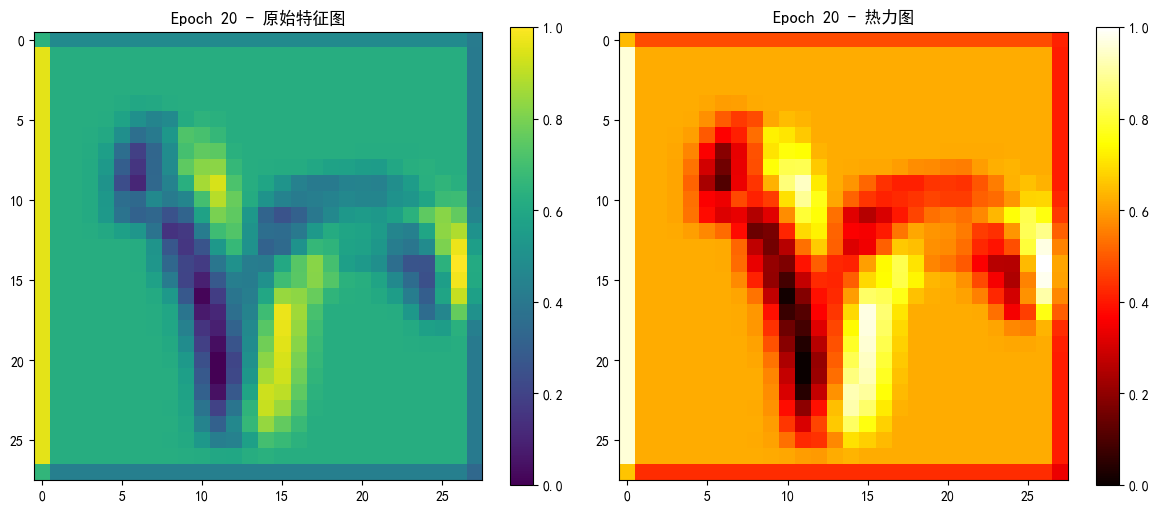

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_20.png
🎯 新最佳模型 (准确率: 0.8733) 已保存到 cnn_res_attention_aug_best.pth
Epoch 21/500: Train Loss: 0.5024 | Val Loss: 0.4692 | Train Top-1: 0.8663 | Val Top-1: 0.8733 | Train Top-3: 0.9739 | Val Top-3: 0.9750
🎯 新最佳模型 (准确率: 0.8775) 已保存到 cnn_res_attention_aug_best.pth
Epoch 22/500: Train Loss: 0.4862 | Val Loss: 0.4707 | Train Top-1: 0.8684 | Val Top-1: 0.8775 | Train Top-3: 0.9739 | Val Top-3: 0.9739
🎯 新最佳模型 (准确率: 0.8829) 已保存到 cnn_res_attention_aug_best.pth
Epoch 23/500: Train Loss: 0.4626 | Val Loss: 0.4215 | Train Top-1: 0.8760 | Val Top-1: 0.8829 | Train Top-3: 0.9757 | Val Top-3: 0.9775
Epoch 24/500: Train Loss: 0.4453 | Val Loss: 0.4309 | Train Top-1: 0.8766 | Val Top-1: 0.8811 | Train Top-3: 0.9766 | Val Top-3: 0.9750
🎯 新最佳模型 (准确率: 0.8834) 已保存到 cnn_res_attention_aug_best.pth
Epoch 25/500: Train Loss: 0.4322 | Val Loss: 0.4203 | Train Top-1: 0.8793 | Val Top-1: 0.8834 | Train Top-3: 0.9780 | Val Top-3: 0.9780
🎯 新最佳模型 (准确率: 0.8858) 已保存到 cnn

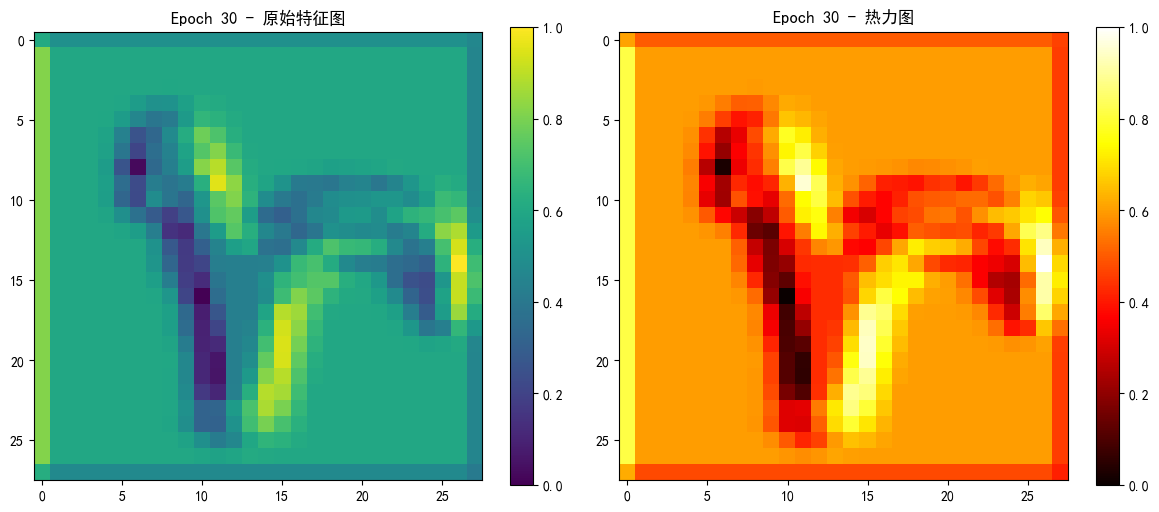

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_30.png
🎯 新最佳模型 (准确率: 0.8948) 已保存到 cnn_res_attention_aug_best.pth
Epoch 31/500: Train Loss: 0.3700 | Val Loss: 0.3689 | Train Top-1: 0.8909 | Val Top-1: 0.8948 | Train Top-3: 0.9824 | Val Top-3: 0.9804
Epoch 32/500: Train Loss: 0.3651 | Val Loss: 0.3498 | Train Top-1: 0.8922 | Val Top-1: 0.8932 | Train Top-3: 0.9822 | Val Top-3: 0.9813
🎯 新最佳模型 (准确率: 0.8969) 已保存到 cnn_res_attention_aug_best.pth
Epoch 33/500: Train Loss: 0.3594 | Val Loss: 0.3633 | Train Top-1: 0.8963 | Val Top-1: 0.8969 | Train Top-3: 0.9823 | Val Top-3: 0.9811
Epoch 34/500: Train Loss: 0.3511 | Val Loss: 0.3598 | Train Top-1: 0.8948 | Val Top-1: 0.8923 | Train Top-3: 0.9844 | Val Top-3: 0.9816
🎯 新最佳模型 (准确率: 0.8975) 已保存到 cnn_res_attention_aug_best.pth
Epoch 35/500: Train Loss: 0.3447 | Val Loss: 0.3434 | Train Top-1: 0.8964 | Val Top-1: 0.8975 | Train Top-3: 0.9838 | Val Top-3: 0.9825
🎯 新最佳模型 (准确率: 0.8993) 已保存到 cnn_res_attention_aug_best.pth
Epoch 36/500: Train Loss: 0.33

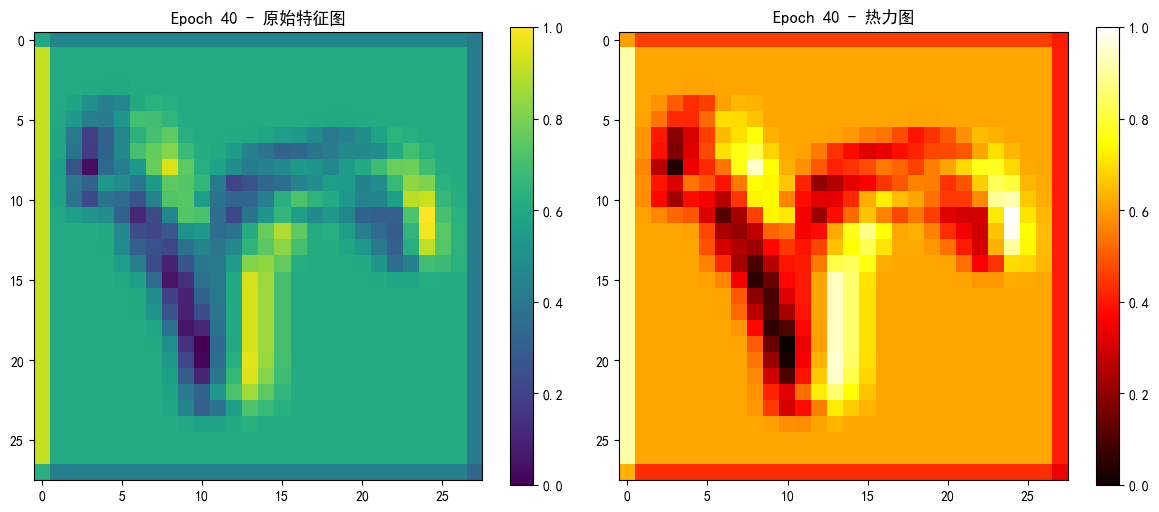

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_40.png
🎯 新最佳模型 (准确率: 0.9007) 已保存到 cnn_res_attention_aug_best.pth
Epoch 41/500: Train Loss: 0.3169 | Val Loss: 0.3247 | Train Top-1: 0.9017 | Val Top-1: 0.9007 | Train Top-3: 0.9861 | Val Top-3: 0.9823
Epoch 42/500: Train Loss: 0.3153 | Val Loss: 0.3257 | Train Top-1: 0.9031 | Val Top-1: 0.8998 | Train Top-3: 0.9851 | Val Top-3: 0.9836
Epoch 43/500: Train Loss: 0.3139 | Val Loss: 0.3345 | Train Top-1: 0.9023 | Val Top-1: 0.8995 | Train Top-3: 0.9859 | Val Top-3: 0.9818
🎯 新最佳模型 (准确率: 0.9014) 已保存到 cnn_res_attention_aug_best.pth
Epoch 44/500: Train Loss: 0.3050 | Val Loss: 0.3228 | Train Top-1: 0.9047 | Val Top-1: 0.9014 | Train Top-3: 0.9872 | Val Top-3: 0.9843
Epoch 45/500: Train Loss: 0.3029 | Val Loss: 0.3398 | Train Top-1: 0.9056 | Val Top-1: 0.8968 | Train Top-3: 0.9863 | Val Top-3: 0.9804
Epoch 46/500: Train Loss: 0.2979 | Val Loss: 0.3190 | Train Top-1: 0.9055 | Val Top-1: 0.8991 | Train Top-3: 0.9869 | Val Top-3: 0.9840
Epoch 47/5

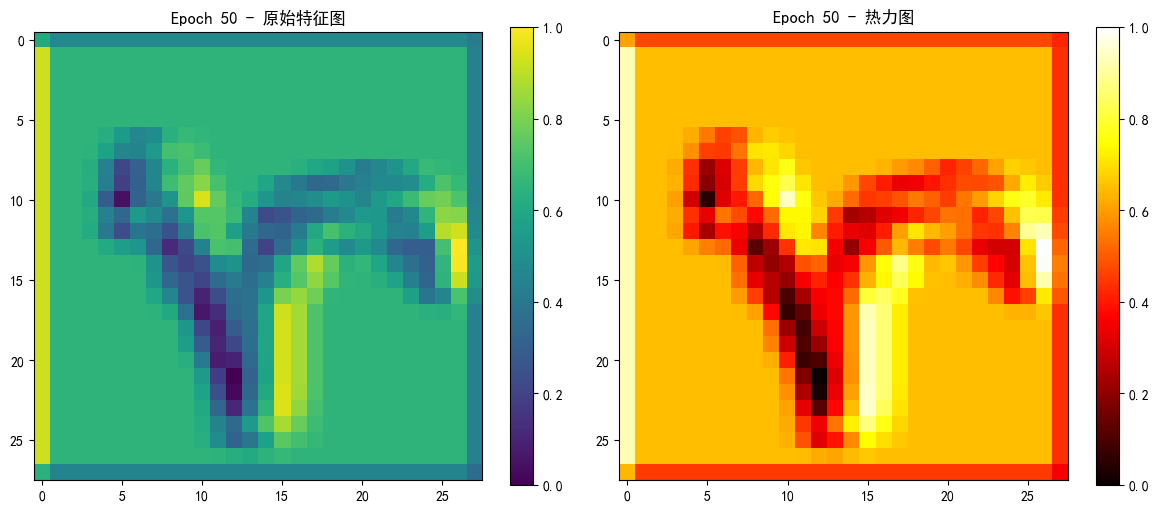

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_50.png
Epoch 51/500: Train Loss: 0.2874 | Val Loss: 0.3213 | Train Top-1: 0.9104 | Val Top-1: 0.8998 | Train Top-3: 0.9886 | Val Top-3: 0.9834
🎯 新最佳模型 (准确率: 0.9025) 已保存到 cnn_res_attention_aug_best.pth
Epoch 52/500: Train Loss: 0.2834 | Val Loss: 0.3115 | Train Top-1: 0.9103 | Val Top-1: 0.9025 | Train Top-3: 0.9888 | Val Top-3: 0.9843
🎯 新最佳模型 (准确率: 0.9058) 已保存到 cnn_res_attention_aug_best.pth
Epoch 53/500: Train Loss: 0.2815 | Val Loss: 0.2986 | Train Top-1: 0.9103 | Val Top-1: 0.9058 | Train Top-3: 0.9880 | Val Top-3: 0.9831
Epoch 54/500: Train Loss: 0.2800 | Val Loss: 0.3028 | Train Top-1: 0.9110 | Val Top-1: 0.9036 | Train Top-3: 0.9888 | Val Top-3: 0.9856
🎯 新最佳模型 (准确率: 0.9070) 已保存到 cnn_res_attention_aug_best.pth
Epoch 55/500: Train Loss: 0.2783 | Val Loss: 0.2949 | Train Top-1: 0.9117 | Val Top-1: 0.9070 | Train Top-3: 0.9888 | Val Top-3: 0.9863
Epoch 56/500: Train Loss: 0.2749 | Val Loss: 0.3258 | Train Top-1: 0.9099 | Val Top-1: 0

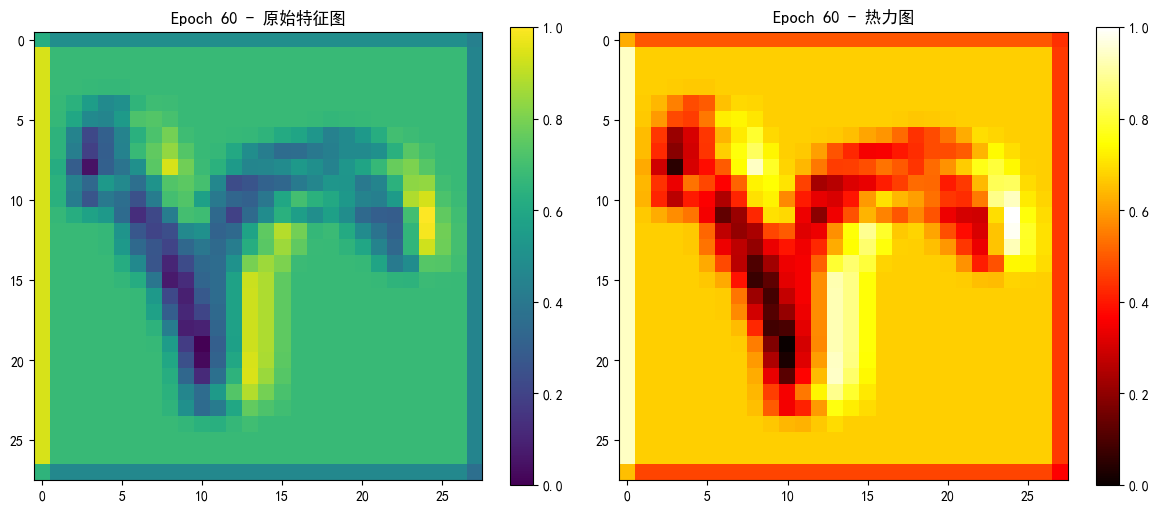

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_60.png
Epoch 61/500: Train Loss: 0.2649 | Val Loss: 0.3056 | Train Top-1: 0.9141 | Val Top-1: 0.9058 | Train Top-3: 0.9896 | Val Top-3: 0.9849
Epoch 62/500: Train Loss: 0.2676 | Val Loss: 0.3034 | Train Top-1: 0.9128 | Val Top-1: 0.9041 | Train Top-3: 0.9894 | Val Top-3: 0.9854
Epoch 63/500: Train Loss: 0.2585 | Val Loss: 0.2933 | Train Top-1: 0.9173 | Val Top-1: 0.9056 | Train Top-3: 0.9902 | Val Top-3: 0.9863
Epoch 64/500: Train Loss: 0.2570 | Val Loss: 0.2933 | Train Top-1: 0.9154 | Val Top-1: 0.9074 | Train Top-3: 0.9899 | Val Top-3: 0.9859
Epoch 65/500: Train Loss: 0.2573 | Val Loss: 0.2891 | Train Top-1: 0.9148 | Val Top-1: 0.9077 | Train Top-3: 0.9902 | Val Top-3: 0.9859
Epoch 66/500: Train Loss: 0.2584 | Val Loss: 0.2924 | Train Top-1: 0.9158 | Val Top-1: 0.9074 | Train Top-3: 0.9900 | Val Top-3: 0.9870
Epoch 67/500: Train Loss: 0.2532 | Val Loss: 0.2988 | Train Top-1: 0.9174 | Val Top-1: 0.9045 | Train Top-3: 0.9907 | Val Top-

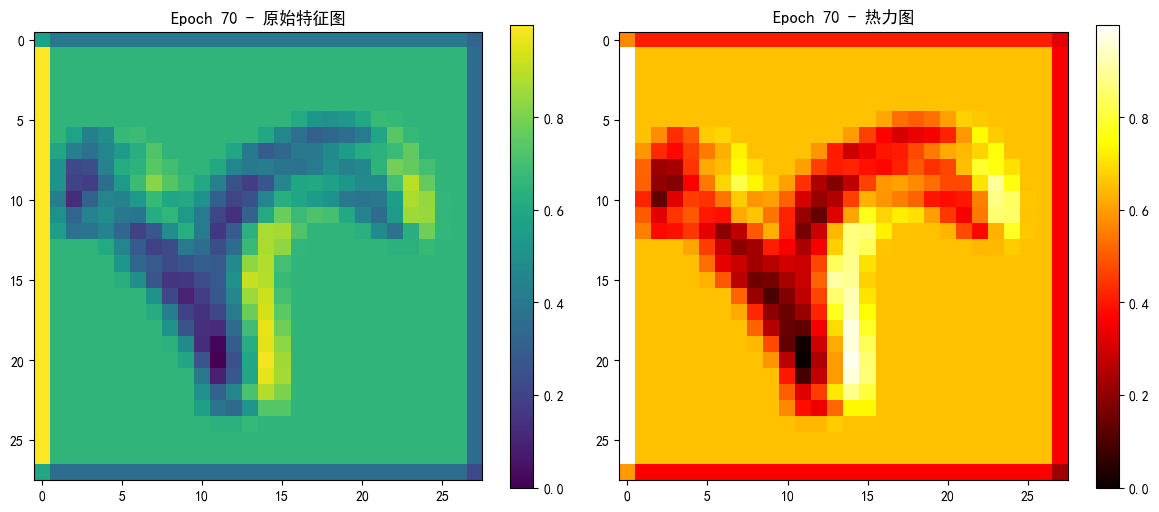

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_70.png
Epoch 71/500: Train Loss: 0.2514 | Val Loss: 0.2898 | Train Top-1: 0.9165 | Val Top-1: 0.9077 | Train Top-3: 0.9910 | Val Top-3: 0.9868
🎯 新最佳模型 (准确率: 0.9095) 已保存到 cnn_res_attention_aug_best.pth
Epoch 72/500: Train Loss: 0.2466 | Val Loss: 0.2809 | Train Top-1: 0.9189 | Val Top-1: 0.9095 | Train Top-3: 0.9911 | Val Top-3: 0.9867
Epoch 73/500: Train Loss: 0.2465 | Val Loss: 0.2965 | Train Top-1: 0.9192 | Val Top-1: 0.9077 | Train Top-3: 0.9910 | Val Top-3: 0.9845
🎯 新最佳模型 (准确率: 0.9101) 已保存到 cnn_res_attention_aug_best.pth
Epoch 74/500: Train Loss: 0.2505 | Val Loss: 0.2915 | Train Top-1: 0.9188 | Val Top-1: 0.9101 | Train Top-3: 0.9895 | Val Top-3: 0.9863
Epoch 75/500: Train Loss: 0.2426 | Val Loss: 0.2909 | Train Top-1: 0.9194 | Val Top-1: 0.9094 | Train Top-3: 0.9915 | Val Top-3: 0.9856
🎯 新最佳模型 (准确率: 0.9112) 已保存到 cnn_res_attention_aug_best.pth
Epoch 76/500: Train Loss: 0.2434 | Val Loss: 0.2795 | Train Top-1: 0.9191 | Val Top-1: 0

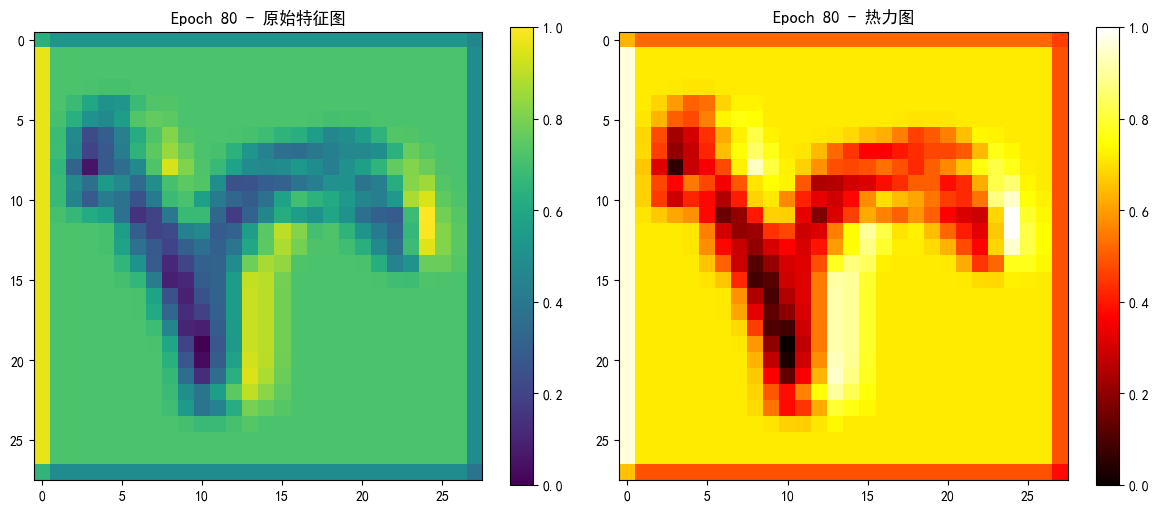

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_80.png
Epoch 81/500: Train Loss: 0.2367 | Val Loss: 0.2915 | Train Top-1: 0.9215 | Val Top-1: 0.9079 | Train Top-3: 0.9920 | Val Top-3: 0.9861
Epoch 82/500: Train Loss: 0.2334 | Val Loss: 0.2840 | Train Top-1: 0.9232 | Val Top-1: 0.9099 | Train Top-3: 0.9922 | Val Top-3: 0.9872
Epoch 83/500: Train Loss: 0.2334 | Val Loss: 0.2800 | Train Top-1: 0.9214 | Val Top-1: 0.9092 | Train Top-3: 0.9925 | Val Top-3: 0.9872
Epoch 84/500: Train Loss: 0.2334 | Val Loss: 0.2846 | Train Top-1: 0.9225 | Val Top-1: 0.9079 | Train Top-3: 0.9920 | Val Top-3: 0.9877
Epoch 85/500: Train Loss: 0.2309 | Val Loss: 0.2849 | Train Top-1: 0.9210 | Val Top-1: 0.9063 | Train Top-3: 0.9925 | Val Top-3: 0.9874
🎯 新最佳模型 (准确率: 0.9117) 已保存到 cnn_res_attention_aug_best.pth
Epoch 86/500: Train Loss: 0.2326 | Val Loss: 0.2776 | Train Top-1: 0.9223 | Val Top-1: 0.9117 | Train Top-3: 0.9924 | Val Top-3: 0.9868
Epoch 87/500: Train Loss: 0.2342 | Val Loss: 0.2726 | Train Top-1: 0

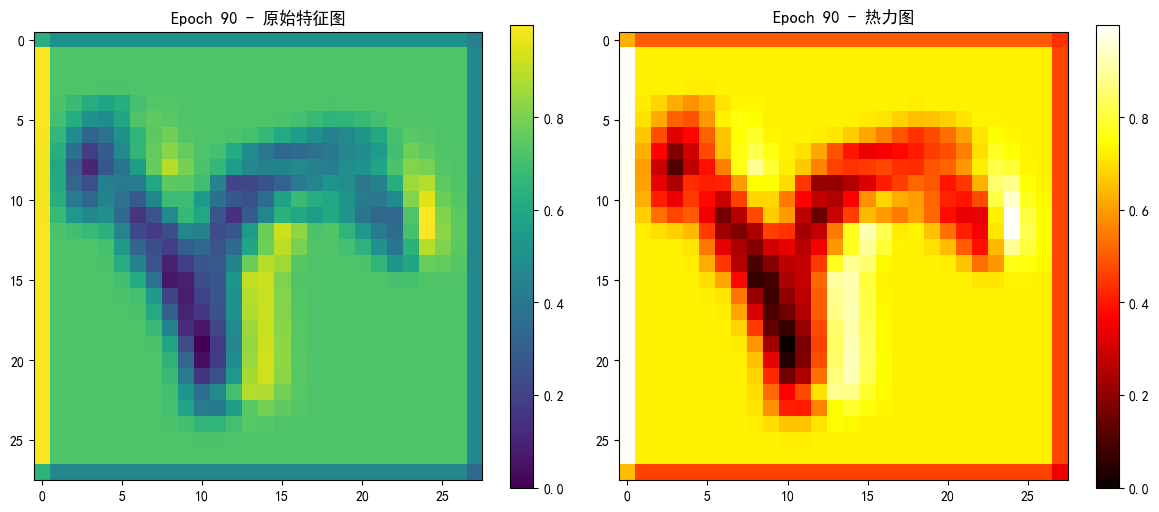

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_90.png
Epoch 91/500: Train Loss: 0.2254 | Val Loss: 0.2882 | Train Top-1: 0.9227 | Val Top-1: 0.9103 | Train Top-3: 0.9927 | Val Top-3: 0.9859
Epoch 92/500: Train Loss: 0.2279 | Val Loss: 0.2831 | Train Top-1: 0.9244 | Val Top-1: 0.9065 | Train Top-3: 0.9930 | Val Top-3: 0.9876
🎯 新最佳模型 (准确率: 0.9135) 已保存到 cnn_res_attention_aug_best.pth
Epoch 93/500: Train Loss: 0.2242 | Val Loss: 0.2814 | Train Top-1: 0.9230 | Val Top-1: 0.9135 | Train Top-3: 0.9932 | Val Top-3: 0.9874
Epoch 94/500: Train Loss: 0.2176 | Val Loss: 0.2834 | Train Top-1: 0.9252 | Val Top-1: 0.9105 | Train Top-3: 0.9930 | Val Top-3: 0.9859
Epoch 95/500: Train Loss: 0.2209 | Val Loss: 0.2781 | Train Top-1: 0.9229 | Val Top-1: 0.9074 | Train Top-3: 0.9931 | Val Top-3: 0.9879
Epoch 96/500: Train Loss: 0.2229 | Val Loss: 0.2945 | Train Top-1: 0.9232 | Val Top-1: 0.9095 | Train Top-3: 0.9928 | Val Top-3: 0.9874
Epoch 97/500: Train Loss: 0.2210 | Val Loss: 0.2812 | Train Top-1: 0

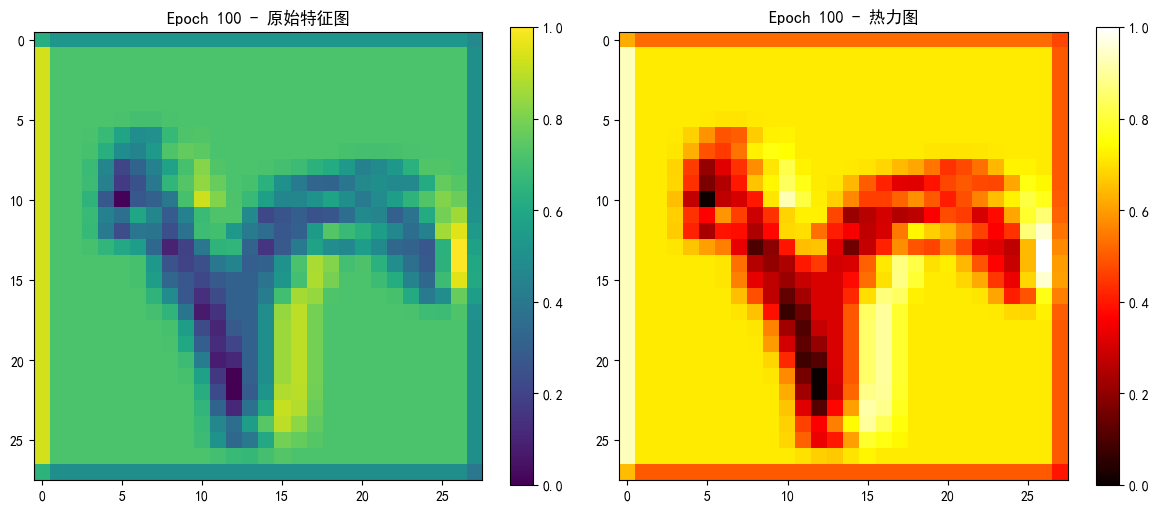

🖼️ 特征图已保存到: runs/20250426_145059\feature_map_epoch_100.png
Epoch 101/500: Train Loss: 0.2188 | Val Loss: 0.3304 | Train Top-1: 0.9266 | Val Top-1: 0.9025 | Train Top-3: 0.9932 | Val Top-3: 0.9832
Epoch 102/500: Train Loss: 0.2143 | Val Loss: 0.2857 | Train Top-1: 0.9254 | Val Top-1: 0.9092 | Train Top-3: 0.9938 | Val Top-3: 0.9868
⏹️ 早停触发: 验证准确率连续 10 轮未提升
✅ 特征图钩子已移除


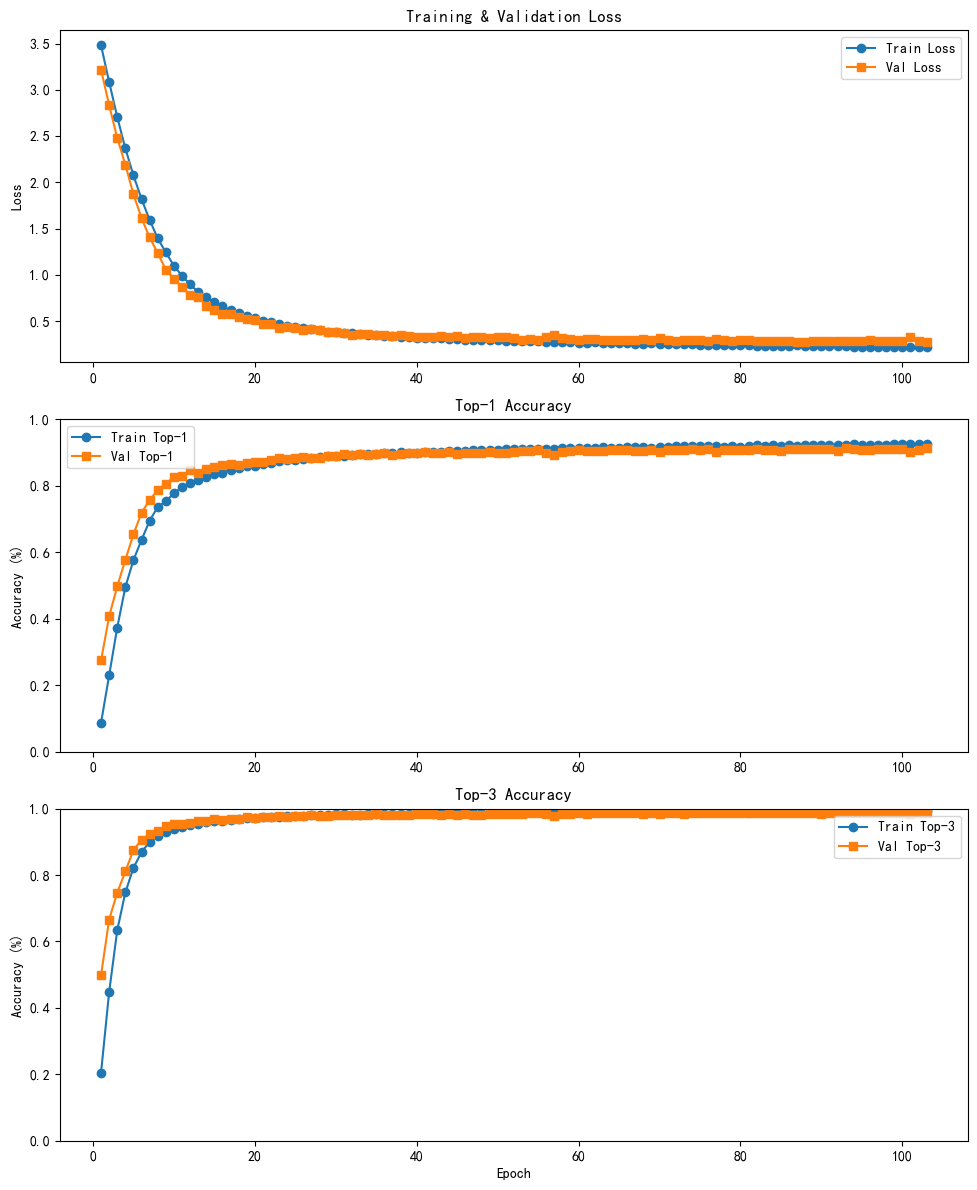

📊 训练图表已保存到: training_plots\training_metrics_20250426_151804.png
训练结束。


In [38]:
CNNWithAttention = CNNModel(label_num, use_attention=True) # 调用模型
print(CNNWithAttention)
train_and_validate(
    model=CNNWithAttention,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_aug_best.pth",
)

print("训练结束。")

### 训练模型（无注意力机制）

🔍 特征图钩子已注册到: Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


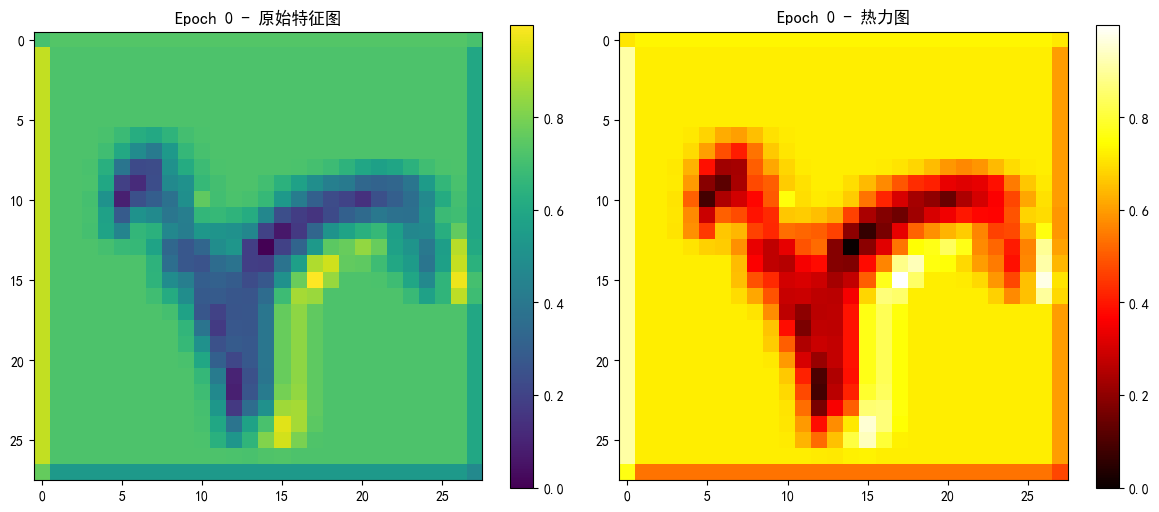

🖼️ 特征图已保存到: runs/20250426_151805\feature_map_epoch_0.png
🎯 新最佳模型 (准确率: 0.3119) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 1/500: Train Loss: 3.4828 | Val Loss: 3.1991 | Train Top-1: 0.0817 | Val Top-1: 0.3119 | Train Top-3: 0.1937 | Val Top-3: 0.5486
🎯 新最佳模型 (准确率: 0.4479) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 2/500: Train Loss: 3.0579 | Val Loss: 2.7959 | Train Top-1: 0.2521 | Val Top-1: 0.4479 | Train Top-3: 0.4816 | Val Top-3: 0.7013
🎯 新最佳模型 (准确率: 0.5677) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 3/500: Train Loss: 2.6793 | Val Loss: 2.3805 | Train Top-1: 0.3922 | Val Top-1: 0.5677 | Train Top-3: 0.6592 | Val Top-3: 0.8014
🎯 新最佳模型 (准确率: 0.6537) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 4/500: Train Loss: 2.3266 | Val Loss: 2.0156 | Train Top-1: 0.5154 | Val Top-1: 0.6537 | Train Top-3: 0.7715 | Val Top-3: 0.8593
🎯 新最佳模型 (准确率: 0.7052) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 5/500: Train Loss: 2.0205 | Val Loss: 1.8034 | Train Top-1: 0.6046 | Val Top-1: 0.7052 | Train To

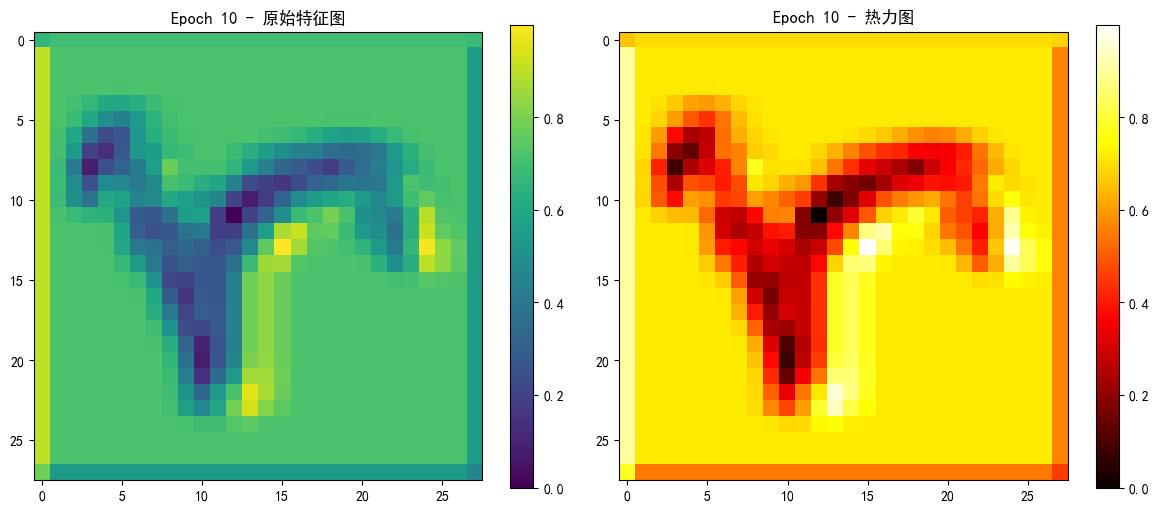

🖼️ 特征图已保存到: runs/20250426_151805\feature_map_epoch_10.png
🎯 新最佳模型 (准确率: 0.8247) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 11/500: Train Loss: 1.0111 | Val Loss: 0.8879 | Train Top-1: 0.7849 | Val Top-1: 0.8247 | Train Top-3: 0.9421 | Val Top-3: 0.9533
🎯 新最佳模型 (准确率: 0.8368) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 12/500: Train Loss: 0.9318 | Val Loss: 0.8315 | Train Top-1: 0.7954 | Val Top-1: 0.8368 | Train Top-3: 0.9463 | Val Top-3: 0.9582
🎯 新最佳模型 (准确率: 0.8434) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 13/500: Train Loss: 0.8714 | Val Loss: 0.7185 | Train Top-1: 0.8013 | Val Top-1: 0.8434 | Train Top-3: 0.9475 | Val Top-3: 0.9609
Epoch 14/500: Train Loss: 0.8112 | Val Loss: 0.7710 | Train Top-1: 0.8100 | Val Top-1: 0.8337 | Train Top-3: 0.9520 | Val Top-3: 0.9566
🎯 新最佳模型 (准确率: 0.8541) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 15/500: Train Loss: 0.7609 | Val Loss: 0.6302 | Train Top-1: 0.8193 | Val Top-1: 0.8541 | Train Top-3: 0.9546 | Val Top-3: 0.9663
🎯 新最佳模型 (准确率: 0.8602) 

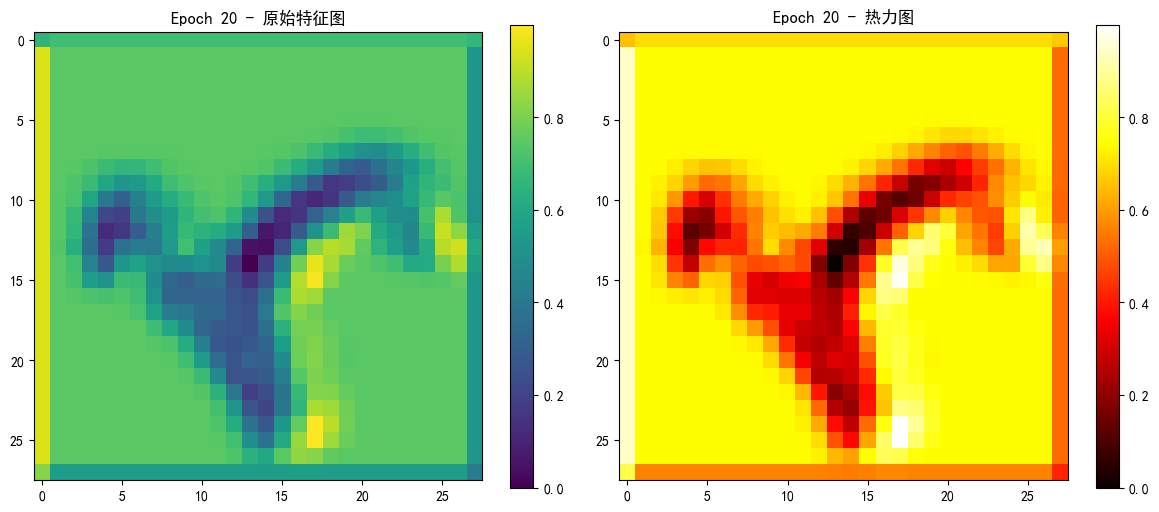

🖼️ 特征图已保存到: runs/20250426_151805\feature_map_epoch_20.png
Epoch 21/500: Train Loss: 0.5902 | Val Loss: 0.5066 | Train Top-1: 0.8402 | Val Top-1: 0.8640 | Train Top-3: 0.9661 | Val Top-3: 0.9712
🎯 新最佳模型 (准确率: 0.8726) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 22/500: Train Loss: 0.5663 | Val Loss: 0.4803 | Train Top-1: 0.8453 | Val Top-1: 0.8726 | Train Top-3: 0.9671 | Val Top-3: 0.9714
🎯 新最佳模型 (准确率: 0.8782) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 23/500: Train Loss: 0.5489 | Val Loss: 0.4522 | Train Top-1: 0.8471 | Val Top-1: 0.8782 | Train Top-3: 0.9684 | Val Top-3: 0.9755
Epoch 24/500: Train Loss: 0.5295 | Val Loss: 0.4476 | Train Top-1: 0.8522 | Val Top-1: 0.8732 | Train Top-3: 0.9703 | Val Top-3: 0.9741
Epoch 25/500: Train Loss: 0.5164 | Val Loss: 0.4388 | Train Top-1: 0.8569 | Val Top-1: 0.8728 | Train Top-3: 0.9723 | Val Top-3: 0.9750
🎯 新最佳模型 (准确率: 0.8829) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 26/500: Train Loss: 0.5109 | Val Loss: 0.4252 | Train Top-1: 0.8541 | Val To

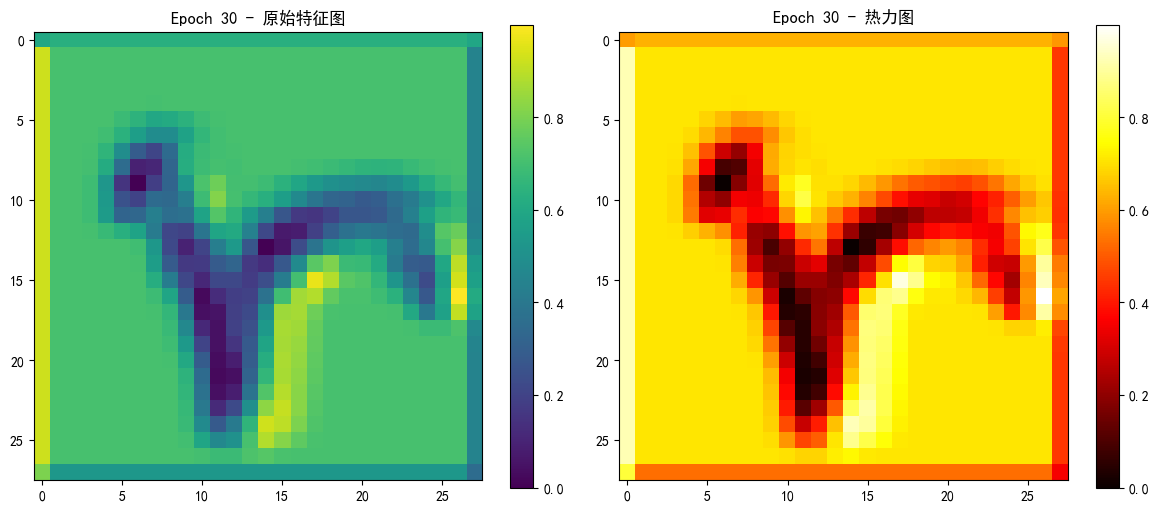

🖼️ 特征图已保存到: runs/20250426_151805\feature_map_epoch_30.png
Epoch 31/500: Train Loss: 0.4628 | Val Loss: 0.4125 | Train Top-1: 0.8649 | Val Top-1: 0.8838 | Train Top-3: 0.9746 | Val Top-3: 0.9777
🎯 新最佳模型 (准确率: 0.8899) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 32/500: Train Loss: 0.4479 | Val Loss: 0.3812 | Train Top-1: 0.8673 | Val Top-1: 0.8899 | Train Top-3: 0.9757 | Val Top-3: 0.9789
🎯 新最佳模型 (准确率: 0.8905) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 33/500: Train Loss: 0.4442 | Val Loss: 0.3739 | Train Top-1: 0.8679 | Val Top-1: 0.8905 | Train Top-3: 0.9751 | Val Top-3: 0.9811
🎯 新最佳模型 (准确率: 0.8941) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 34/500: Train Loss: 0.4335 | Val Loss: 0.3670 | Train Top-1: 0.8713 | Val Top-1: 0.8941 | Train Top-3: 0.9771 | Val Top-3: 0.9813
Epoch 35/500: Train Loss: 0.4249 | Val Loss: 0.3761 | Train Top-1: 0.8736 | Val Top-1: 0.8906 | Train Top-3: 0.9761 | Val Top-3: 0.9773
Epoch 36/500: Train Loss: 0.4181 | Val Loss: 0.3745 | Train Top-1: 0.8736 | Val To

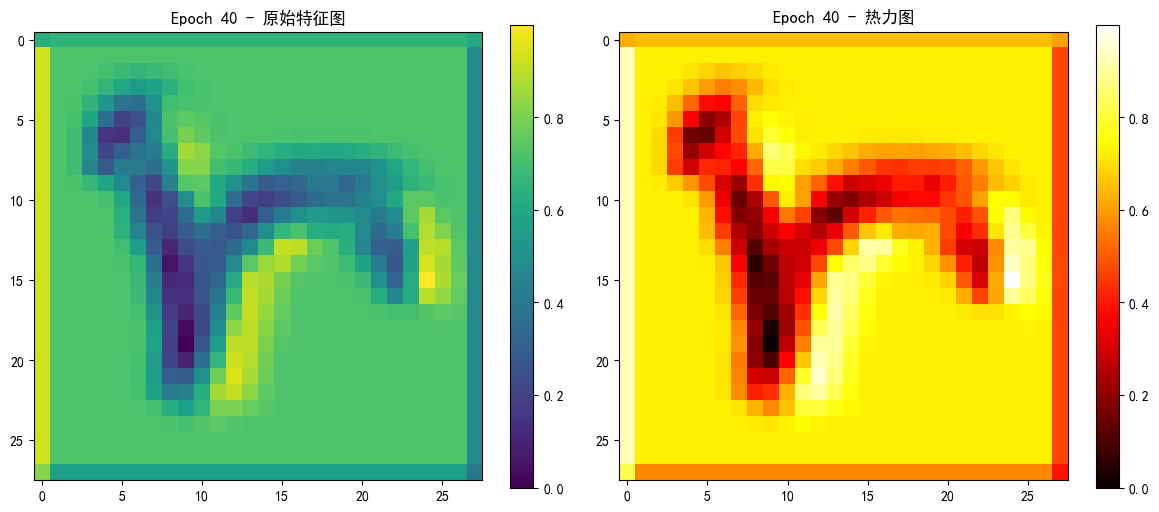

🖼️ 特征图已保存到: runs/20250426_151805\feature_map_epoch_40.png
Epoch 41/500: Train Loss: 0.3896 | Val Loss: 0.3491 | Train Top-1: 0.8834 | Val Top-1: 0.8944 | Train Top-3: 0.9798 | Val Top-3: 0.9813
Epoch 42/500: Train Loss: 0.3893 | Val Loss: 0.3516 | Train Top-1: 0.8797 | Val Top-1: 0.8919 | Train Top-3: 0.9788 | Val Top-3: 0.9811
Epoch 43/500: Train Loss: 0.3822 | Val Loss: 0.3451 | Train Top-1: 0.8829 | Val Top-1: 0.8935 | Train Top-3: 0.9807 | Val Top-3: 0.9805
Epoch 44/500: Train Loss: 0.3790 | Val Loss: 0.3392 | Train Top-1: 0.8856 | Val Top-1: 0.8957 | Train Top-3: 0.9805 | Val Top-3: 0.9814
🎯 新最佳模型 (准确率: 0.8996) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 45/500: Train Loss: 0.3741 | Val Loss: 0.3367 | Train Top-1: 0.8862 | Val Top-1: 0.8996 | Train Top-3: 0.9819 | Val Top-3: 0.9825
🎯 新最佳模型 (准确率: 0.9040) 已保存到 cnn_res_noattention_aug_best.pth
Epoch 46/500: Train Loss: 0.3687 | Val Loss: 0.3247 | Train Top-1: 0.8873 | Val Top-1: 0.9040 | Train Top-3: 0.9817 | Val Top-3: 0.9841
Epoch 

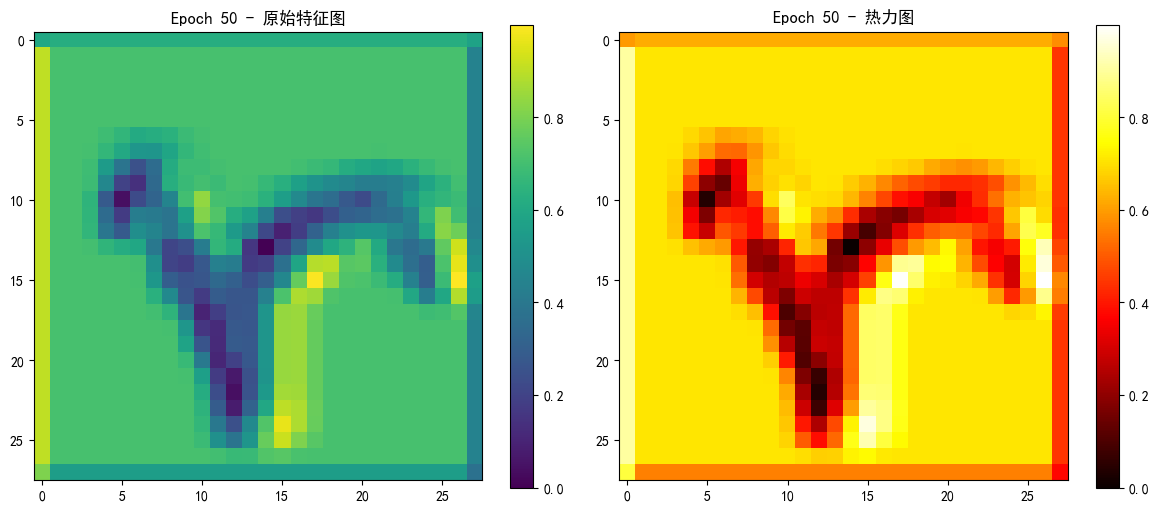

🖼️ 特征图已保存到: runs/20250426_151805\feature_map_epoch_50.png
Epoch 51/500: Train Loss: 0.3546 | Val Loss: 0.3239 | Train Top-1: 0.8900 | Val Top-1: 0.9004 | Train Top-3: 0.9832 | Val Top-3: 0.9843
Epoch 52/500: Train Loss: 0.3483 | Val Loss: 0.3323 | Train Top-1: 0.8909 | Val Top-1: 0.8989 | Train Top-3: 0.9825 | Val Top-3: 0.9822
Epoch 53/500: Train Loss: 0.3487 | Val Loss: 0.3172 | Train Top-1: 0.8908 | Val Top-1: 0.8986 | Train Top-3: 0.9841 | Val Top-3: 0.9852
Epoch 54/500: Train Loss: 0.3441 | Val Loss: 0.3253 | Train Top-1: 0.8901 | Val Top-1: 0.9023 | Train Top-3: 0.9838 | Val Top-3: 0.9825
Epoch 55/500: Train Loss: 0.3427 | Val Loss: 0.3312 | Train Top-1: 0.8920 | Val Top-1: 0.8996 | Train Top-3: 0.9839 | Val Top-3: 0.9831
⏹️ 早停触发: 验证准确率连续 10 轮未提升
✅ 特征图钩子已移除


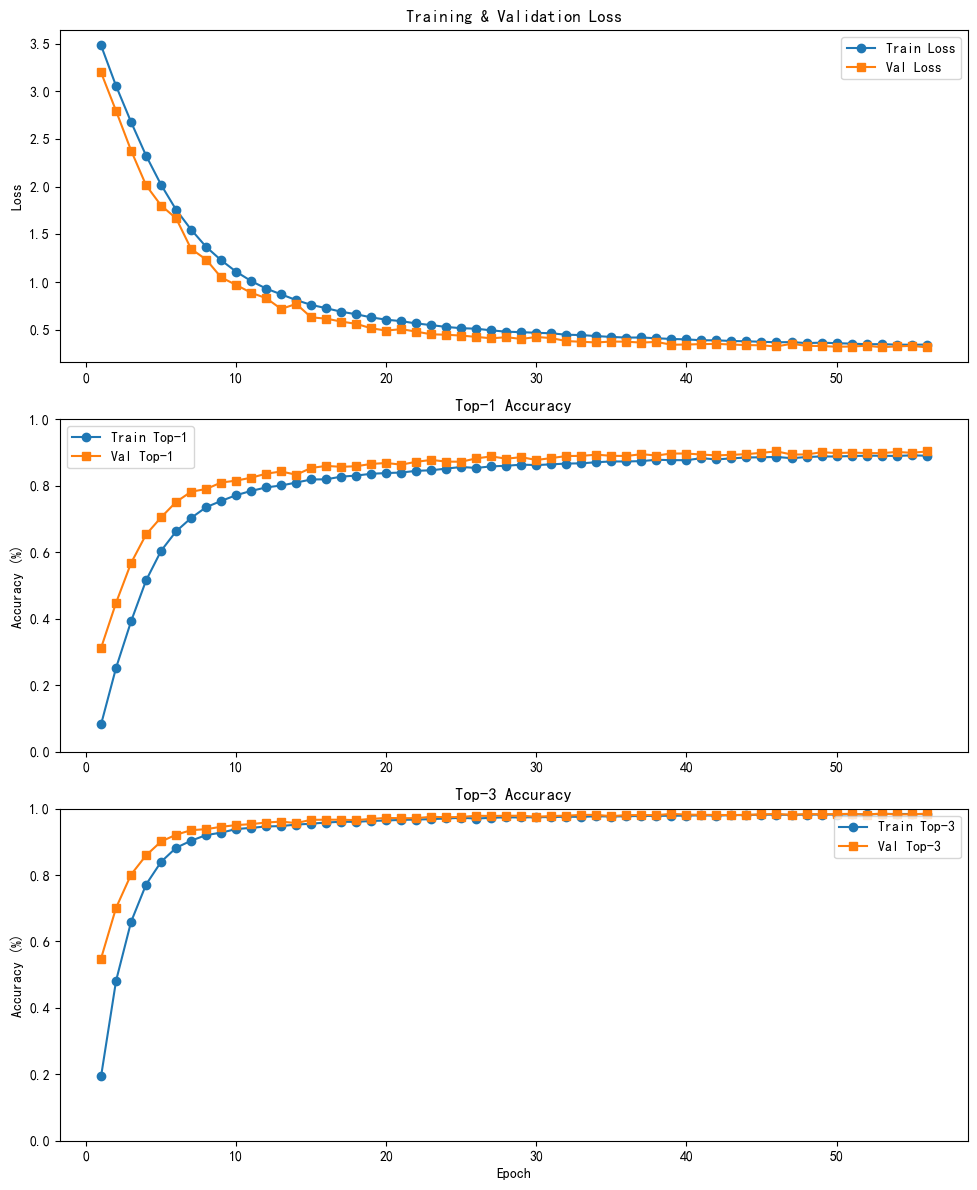

📊 训练图表已保存到: training_plots\training_metrics_20250426_153204.png


CNNModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (MaxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5):

In [39]:
CNNnoAttention = CNNModel(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=CNNnoAttention,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_aug_best.pth"
)

### 无数据增强

训练集每个类别样本数：
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150

测试集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150


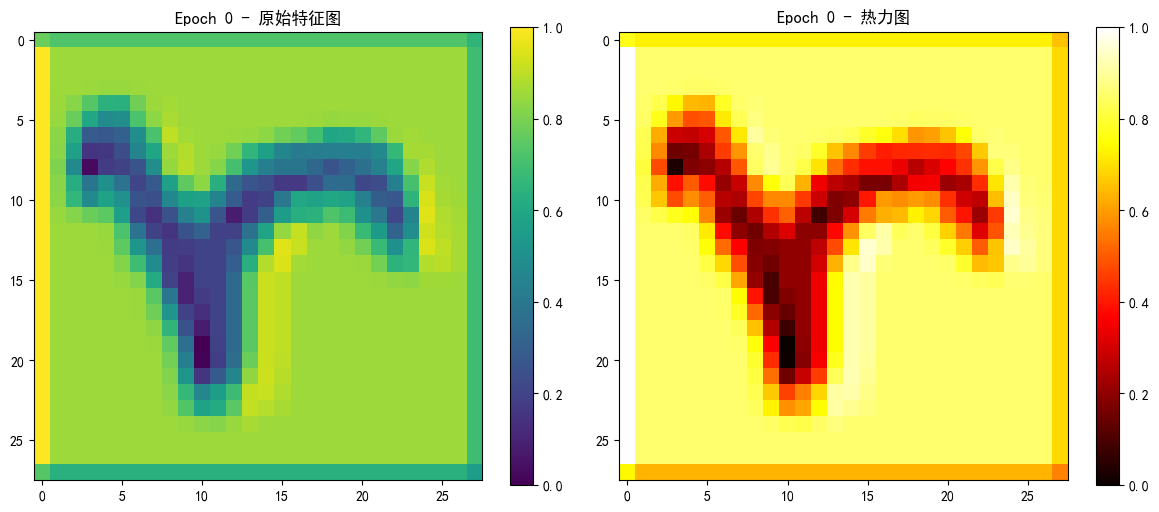

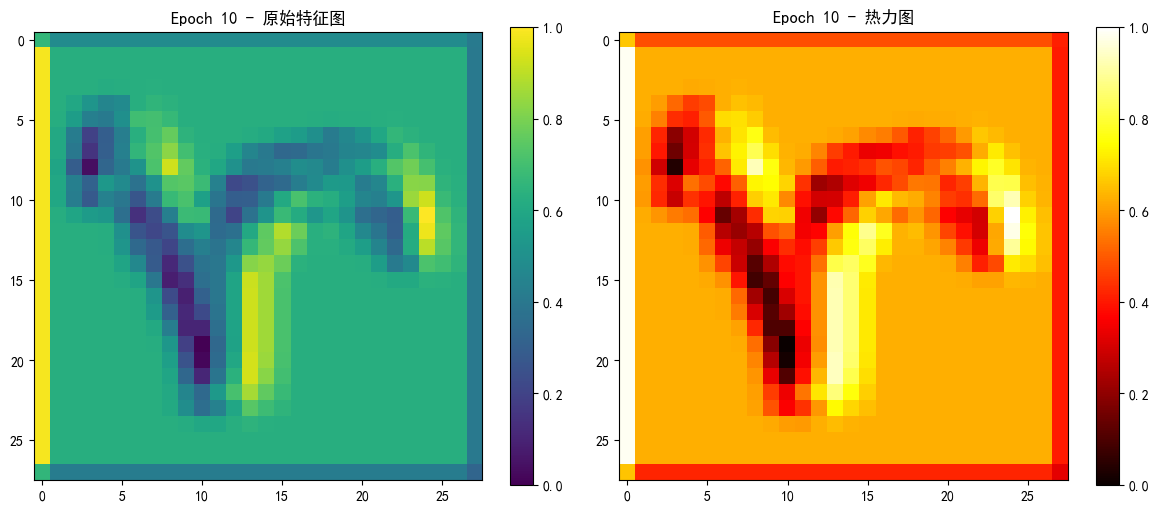

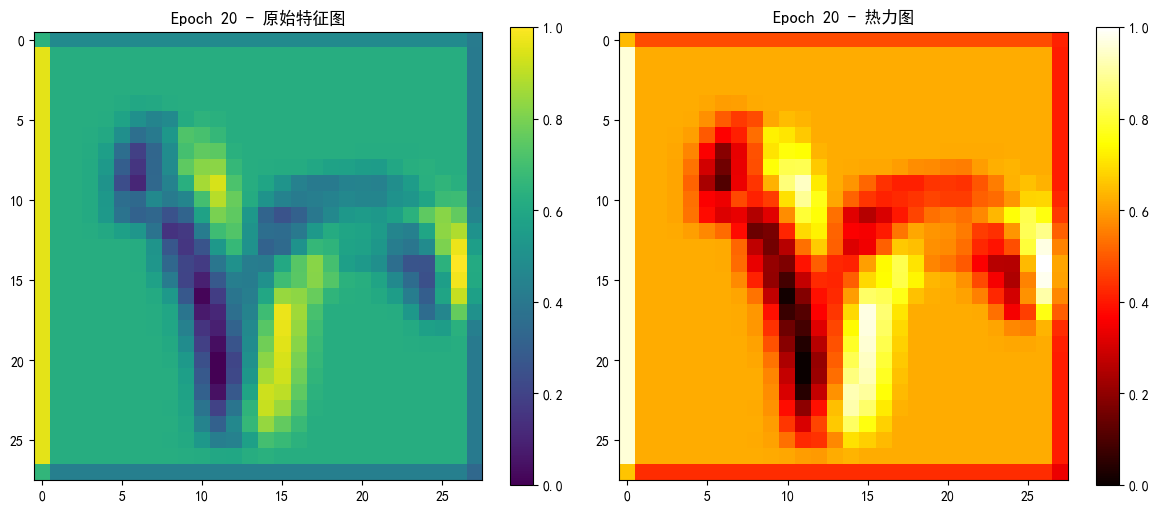

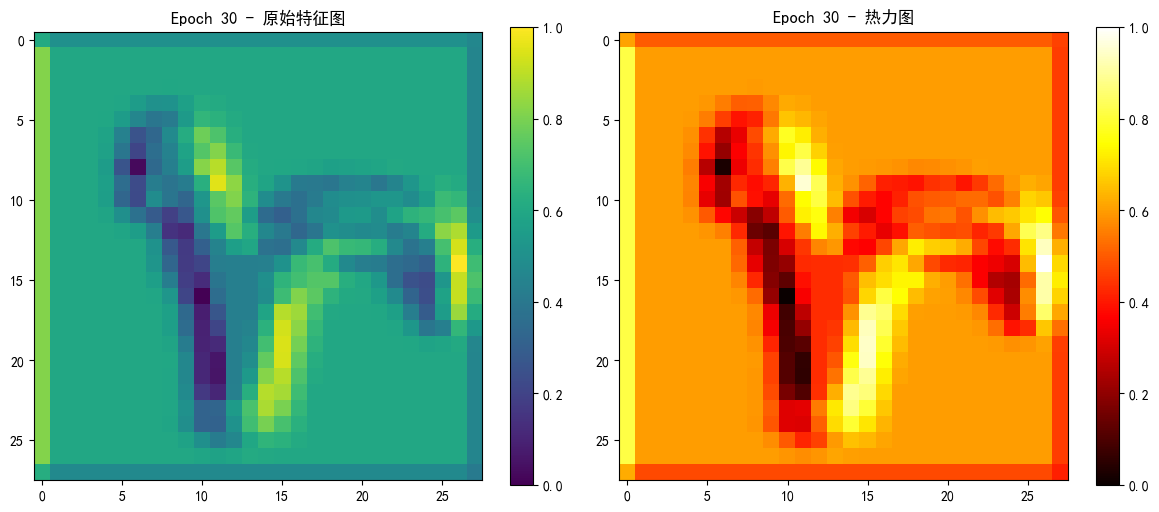

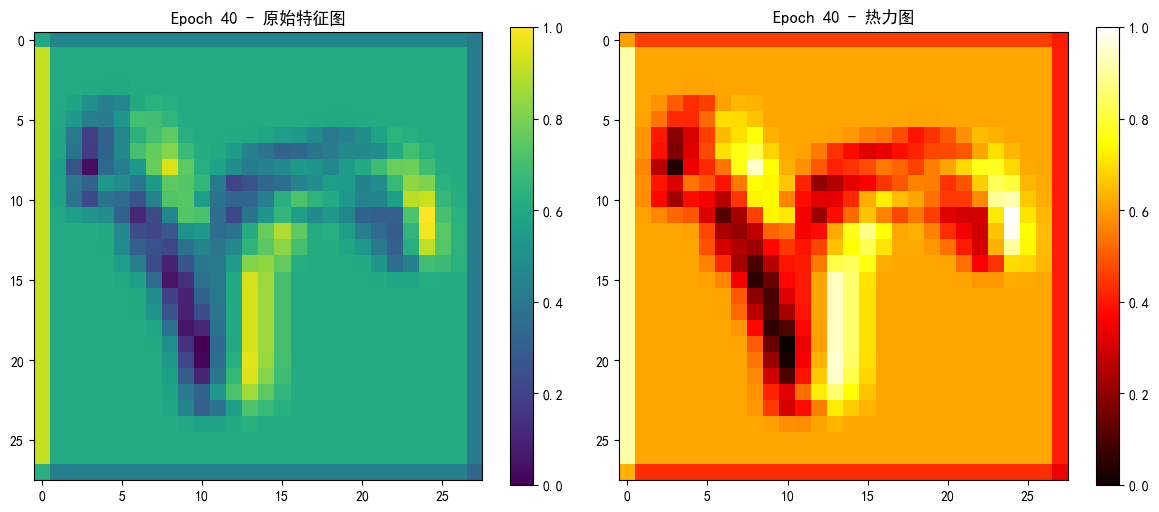

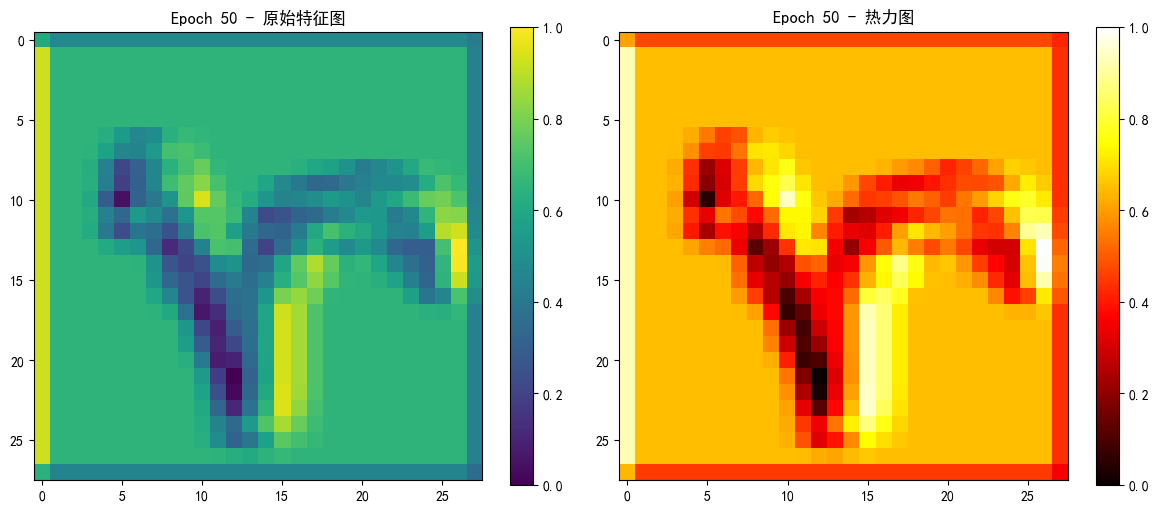

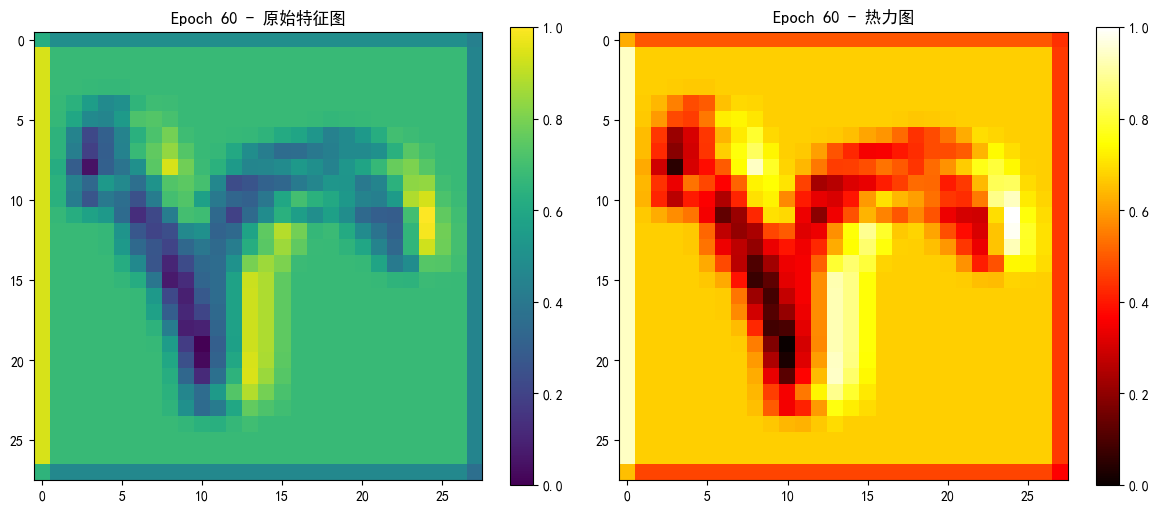

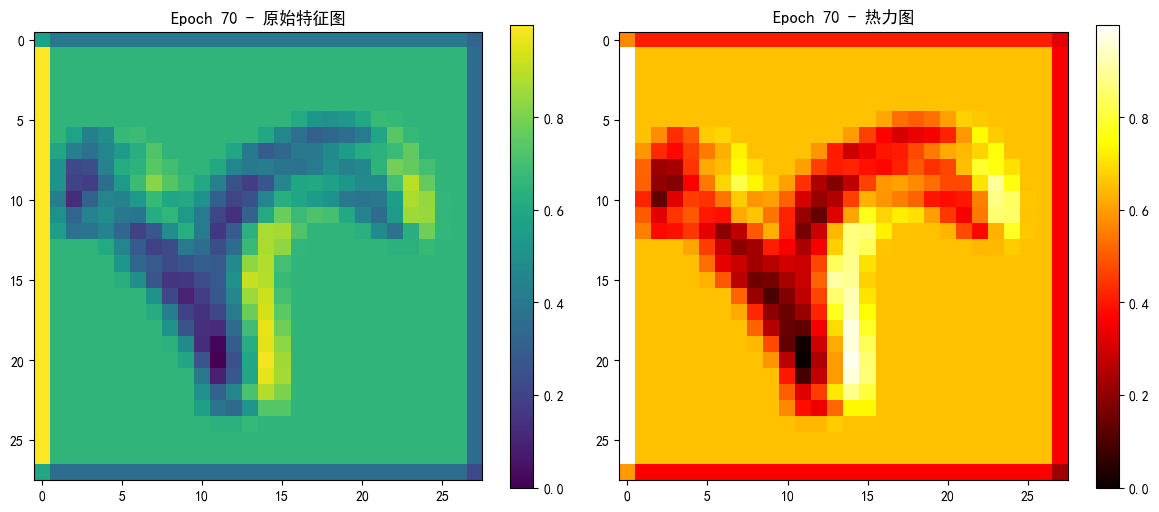

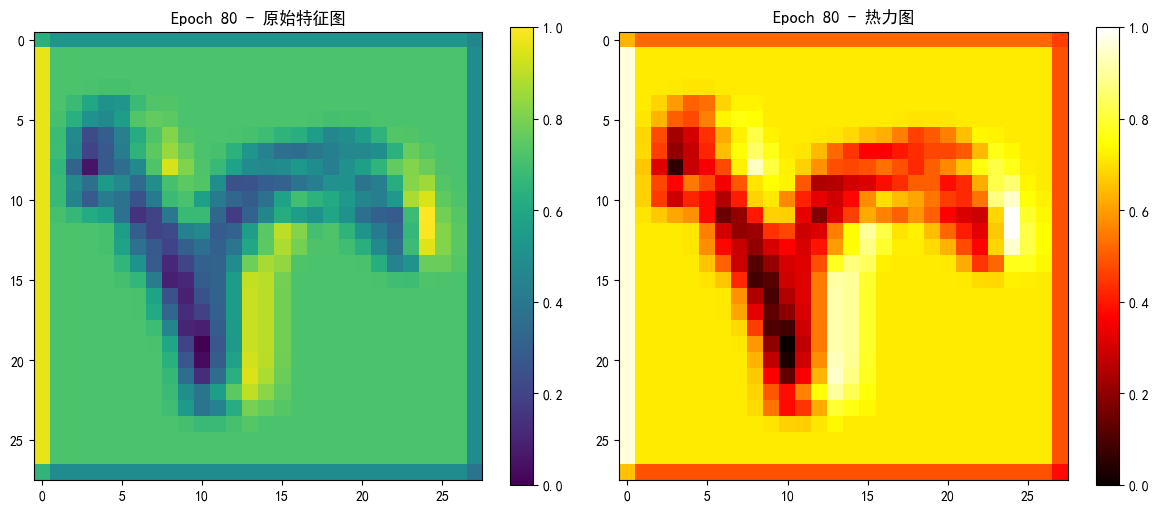

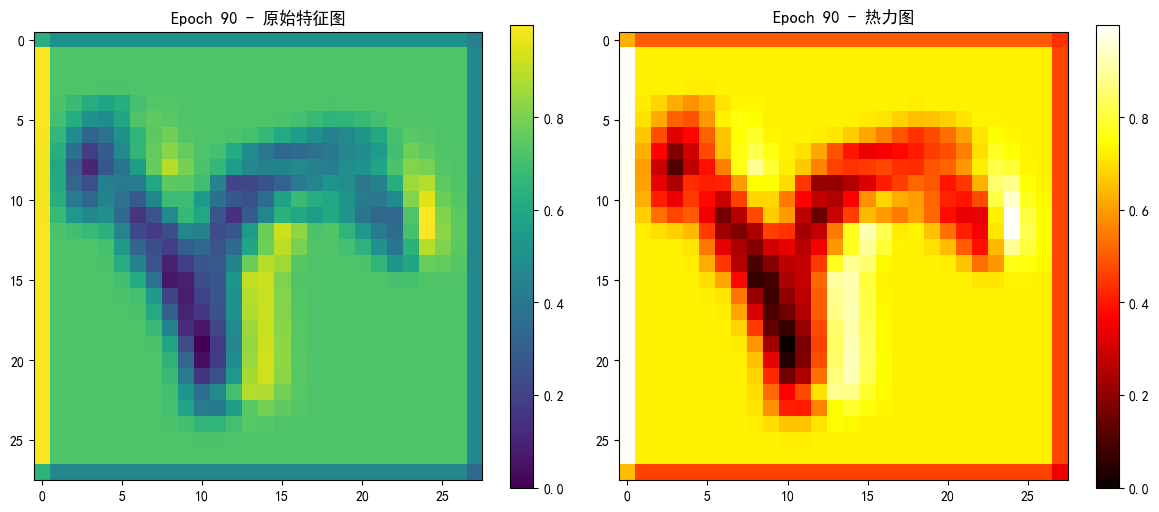

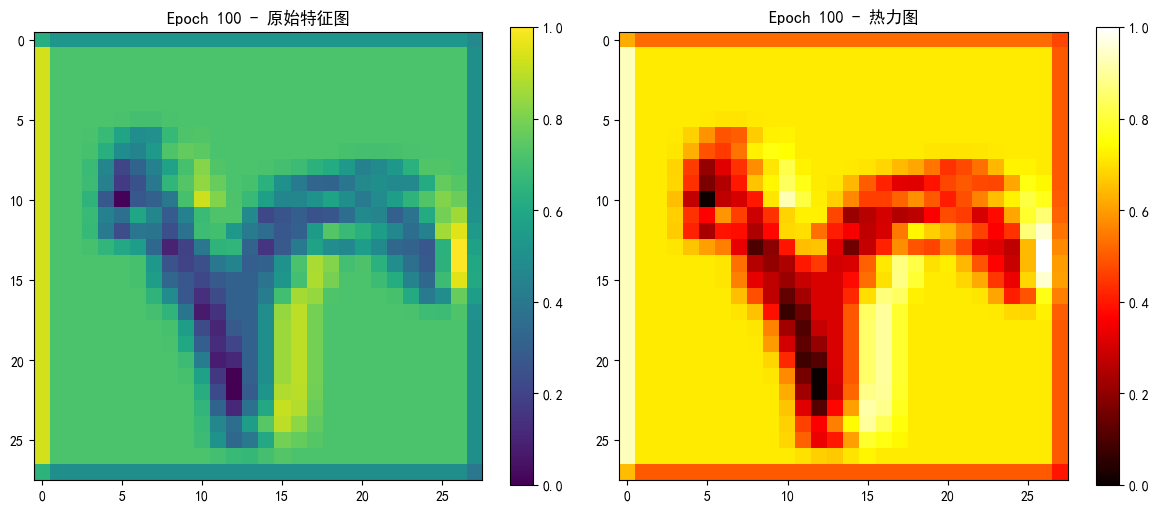

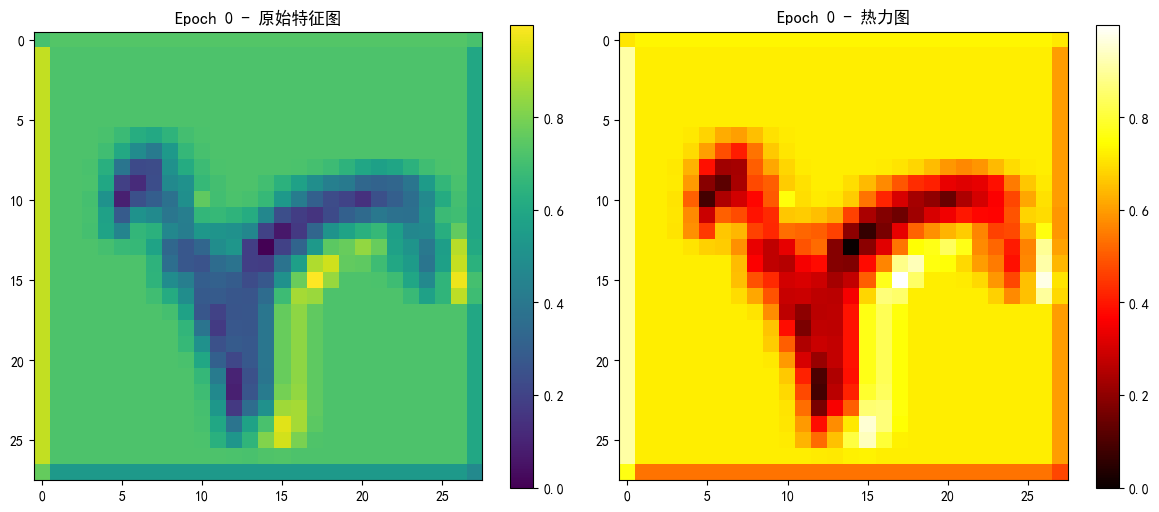

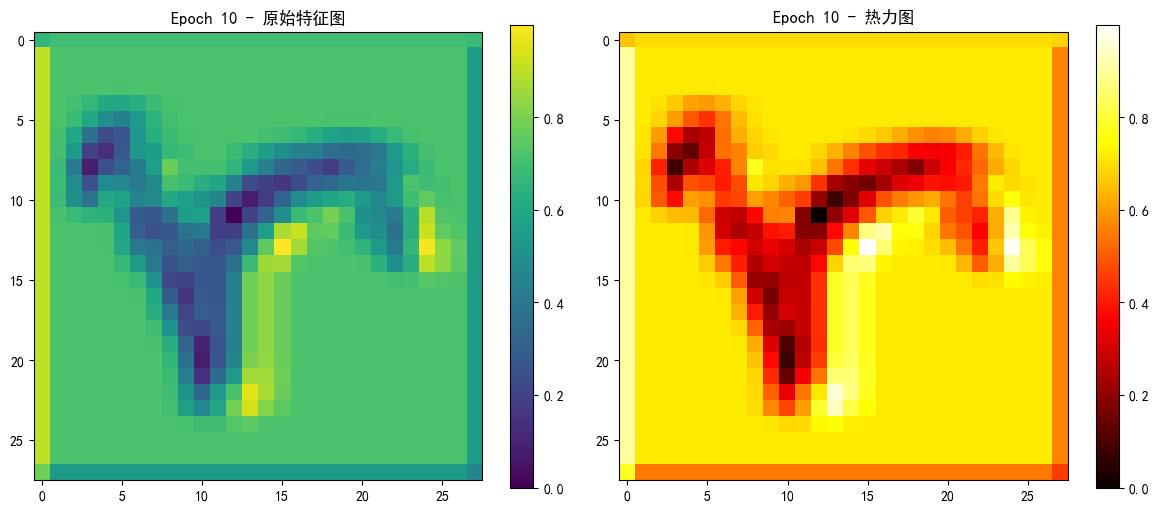

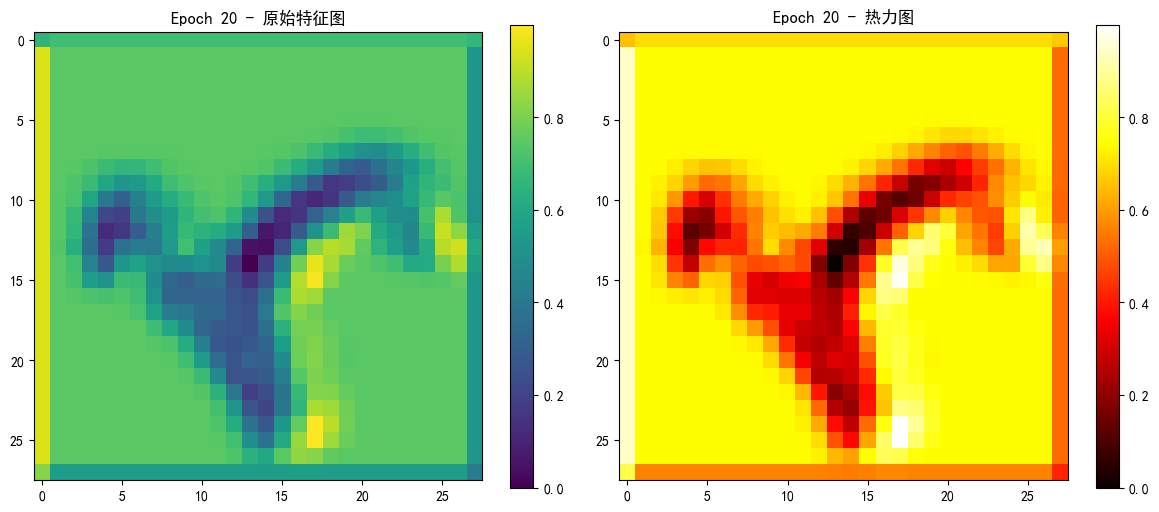

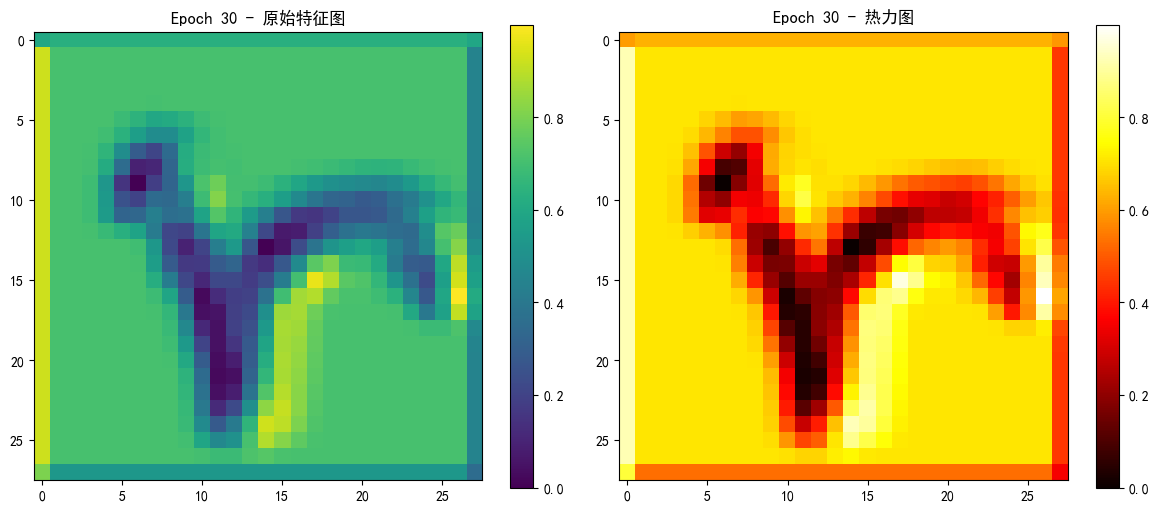

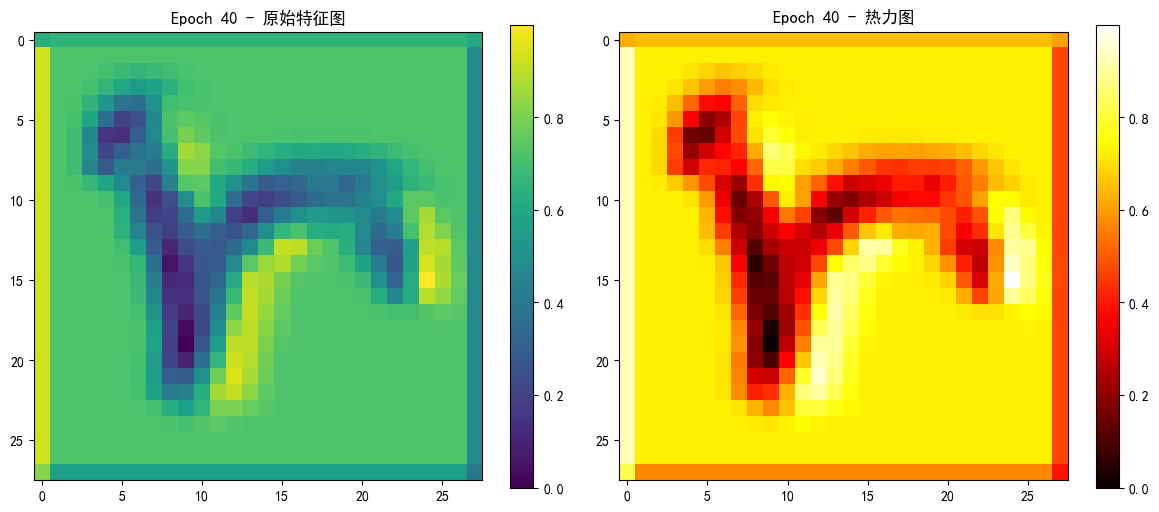

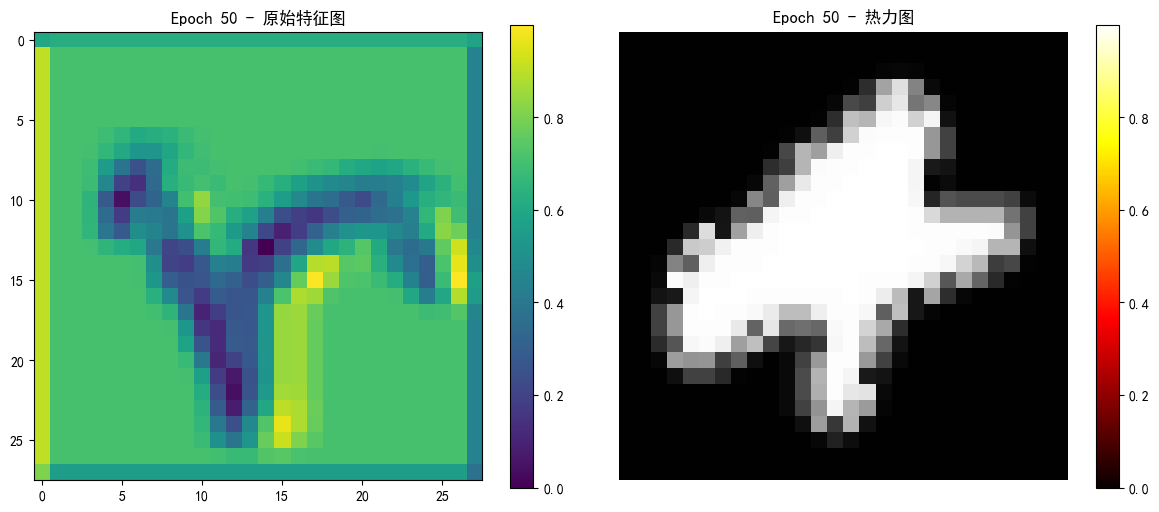

In [40]:
transform = AlbumentationsTransformBase()  # 不使用数据增强


train_loader, val_loader, test_loader2, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42,
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader2.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

🔍 特征图钩子已注册到: Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


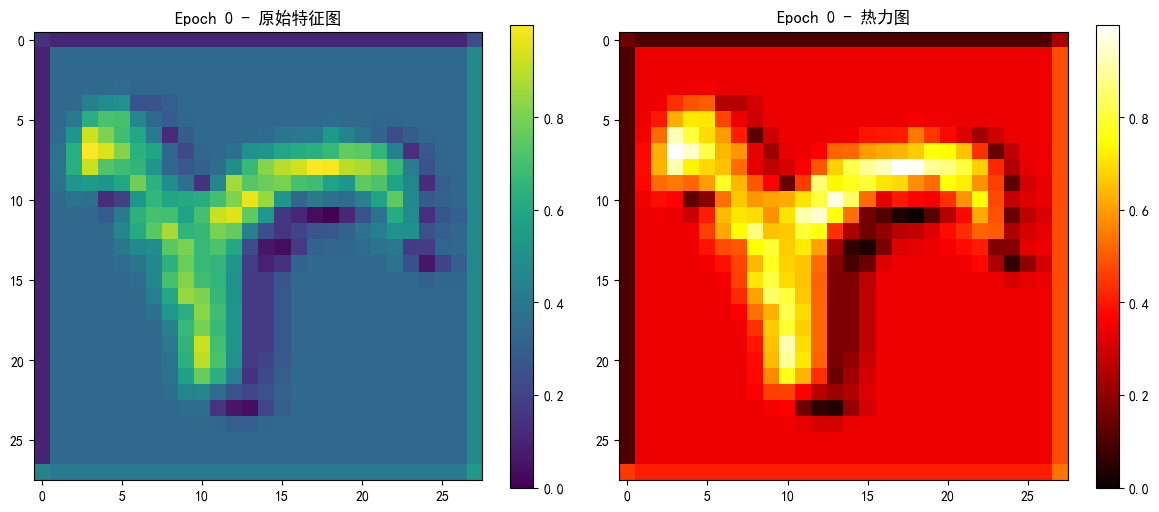

🖼️ 特征图已保存到: runs/20250426_153206\feature_map_epoch_0.png
🎯 新最佳模型 (准确率: 0.3773) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 1/500: Train Loss: 3.4678 | Val Loss: 3.1462 | Train Top-1: 0.0898 | Val Top-1: 0.3773 | Train Top-3: 0.2094 | Val Top-3: 0.6117
🎯 新最佳模型 (准确率: 0.4773) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 2/500: Train Loss: 3.0001 | Val Loss: 2.7041 | Train Top-1: 0.2903 | Val Top-1: 0.4773 | Train Top-3: 0.5186 | Val Top-3: 0.7249
🎯 新最佳模型 (准确率: 0.5877) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 3/500: Train Loss: 2.5750 | Val Loss: 2.2889 | Train Top-1: 0.4407 | Val Top-1: 0.5877 | Train Top-3: 0.7072 | Val Top-3: 0.8395
🎯 新最佳模型 (准确率: 0.6748) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 4/500: Train Loss: 2.2136 | Val Loss: 1.9660 | Train Top-1: 0.5503 | Val Top-1: 0.6748 | Train Top-3: 0.8102 | Val Top-3: 0.8852
🎯 新最佳模型 (准确率: 0.7465) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 5/500: Train Loss: 1.9038 | Val Loss: 1.6872 | Train Top-1: 0.6436 | Val Top-1: 0.7465 | Train To

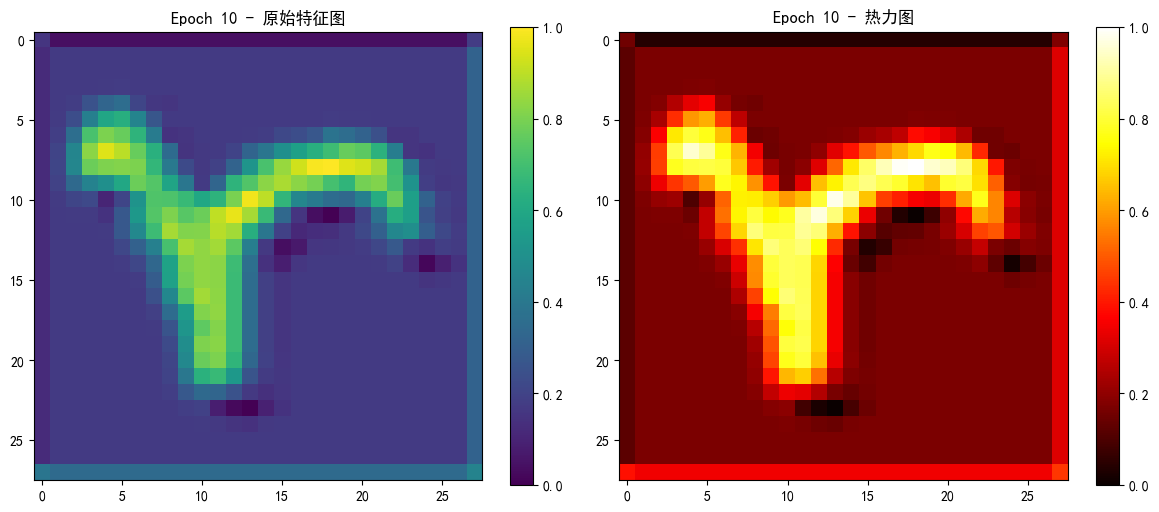

🖼️ 特征图已保存到: runs/20250426_153206\feature_map_epoch_10.png
🎯 新最佳模型 (准确率: 0.8613) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 11/500: Train Loss: 0.8529 | Val Loss: 0.7429 | Train Top-1: 0.8286 | Val Top-1: 0.8613 | Train Top-3: 0.9594 | Val Top-3: 0.9668
🎯 新最佳模型 (准确率: 0.8656) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 12/500: Train Loss: 0.7738 | Val Loss: 0.6589 | Train Top-1: 0.8392 | Val Top-1: 0.8656 | Train Top-3: 0.9632 | Val Top-3: 0.9695
🎯 新最佳模型 (准确率: 0.8755) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 13/500: Train Loss: 0.7025 | Val Loss: 0.6038 | Train Top-1: 0.8490 | Val Top-1: 0.8755 | Train Top-3: 0.9661 | Val Top-3: 0.9706
Epoch 14/500: Train Loss: 0.6452 | Val Loss: 0.5638 | Train Top-1: 0.8567 | Val Top-1: 0.8748 | Train Top-3: 0.9699 | Val Top-3: 0.9732
🎯 新最佳模型 (准确率: 0.8825) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 15/500: Train Loss: 0.6023 | Val Loss: 0.5164 | Train Top-1: 0.8616 | Val Top-1: 0.8825 | Train Top-3: 0.9719 | Val Top-3: 0.9744
🎯 新最佳模型 (准确率: 0.8832) 

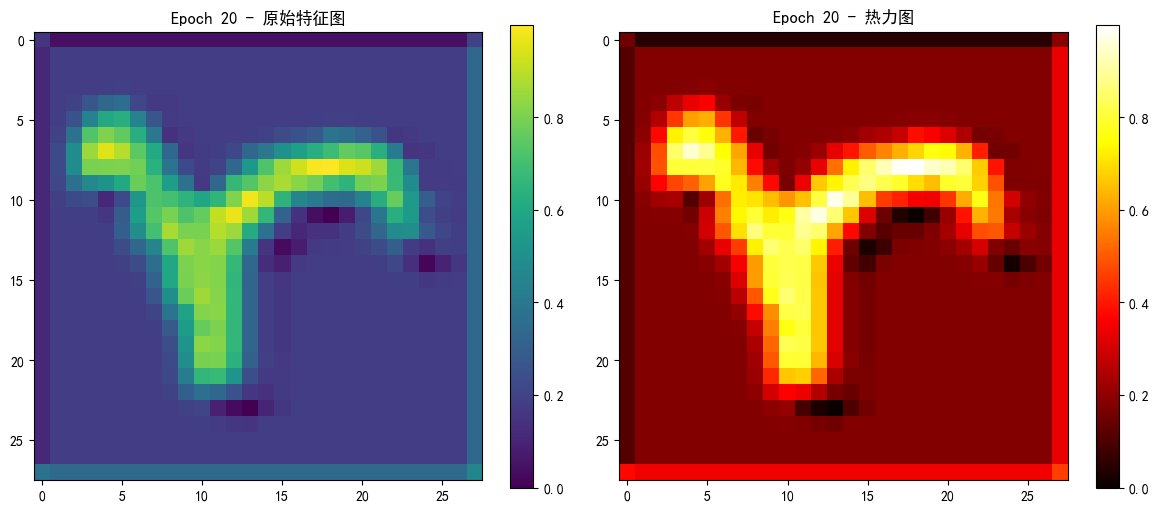

🖼️ 特征图已保存到: runs/20250426_153206\feature_map_epoch_20.png
Epoch 21/500: Train Loss: 0.4277 | Val Loss: 0.4082 | Train Top-1: 0.8891 | Val Top-1: 0.8928 | Train Top-3: 0.9800 | Val Top-3: 0.9795
🎯 新最佳模型 (准确率: 0.8951) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 22/500: Train Loss: 0.4064 | Val Loss: 0.3918 | Train Top-1: 0.8923 | Val Top-1: 0.8951 | Train Top-3: 0.9820 | Val Top-3: 0.9795
🎯 新最佳模型 (准确率: 0.8989) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 23/500: Train Loss: 0.3915 | Val Loss: 0.3710 | Train Top-1: 0.8952 | Val Top-1: 0.8989 | Train Top-3: 0.9820 | Val Top-3: 0.9807
🎯 新最佳模型 (准确率: 0.9014) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 24/500: Train Loss: 0.3788 | Val Loss: 0.3732 | Train Top-1: 0.8961 | Val Top-1: 0.9014 | Train Top-3: 0.9834 | Val Top-3: 0.9820
🎯 新最佳模型 (准确率: 0.9018) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 25/500: Train Loss: 0.3634 | Val Loss: 0.3495 | Train Top-1: 0.9002 | Val Top-1: 0.9018 | Train Top-3: 0.9846 | Val Top-3: 0.9823
🎯 新最佳模型 (准确率: 0.9040) 

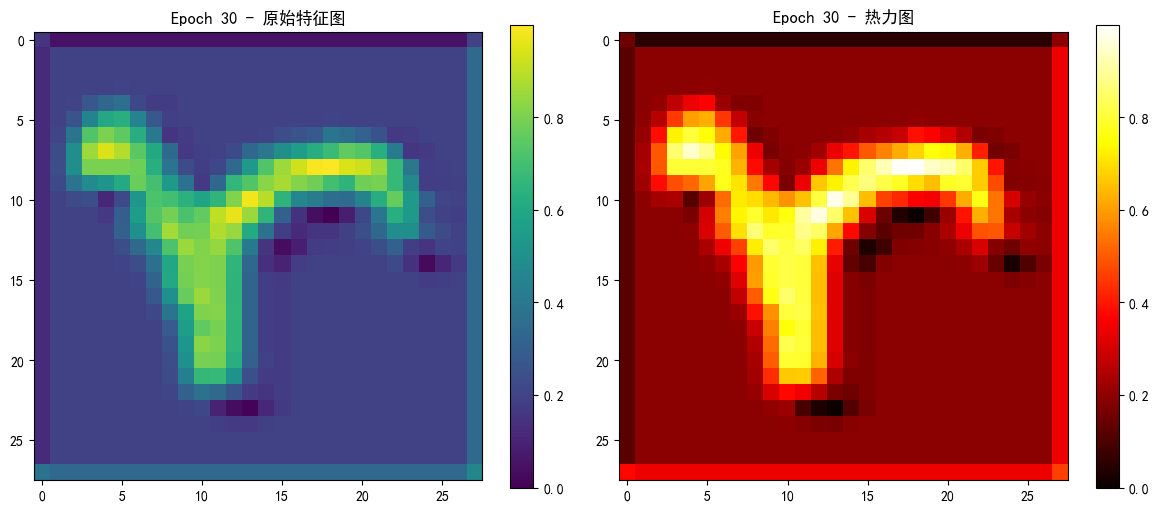

🖼️ 特征图已保存到: runs/20250426_153206\feature_map_epoch_30.png
🎯 新最佳模型 (准确率: 0.9059) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 31/500: Train Loss: 0.3069 | Val Loss: 0.3083 | Train Top-1: 0.9103 | Val Top-1: 0.9059 | Train Top-3: 0.9877 | Val Top-3: 0.9850
Epoch 32/500: Train Loss: 0.3018 | Val Loss: 0.3162 | Train Top-1: 0.9106 | Val Top-1: 0.9040 | Train Top-3: 0.9884 | Val Top-3: 0.9845
Epoch 33/500: Train Loss: 0.2924 | Val Loss: 0.3087 | Train Top-1: 0.9146 | Val Top-1: 0.9031 | Train Top-3: 0.9888 | Val Top-3: 0.9827
Epoch 34/500: Train Loss: 0.2863 | Val Loss: 0.3147 | Train Top-1: 0.9146 | Val Top-1: 0.9036 | Train Top-3: 0.9890 | Val Top-3: 0.9840
Epoch 35/500: Train Loss: 0.2829 | Val Loss: 0.3057 | Train Top-1: 0.9159 | Val Top-1: 0.9031 | Train Top-3: 0.9891 | Val Top-3: 0.9850
🎯 新最佳模型 (准确率: 0.9097) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 36/500: Train Loss: 0.2739 | Val Loss: 0.2878 | Train Top-1: 0.9184 | Val Top-1: 0.9097 | Train Top-3: 0.9892 | Val Top-3: 0.9858
Epoch 

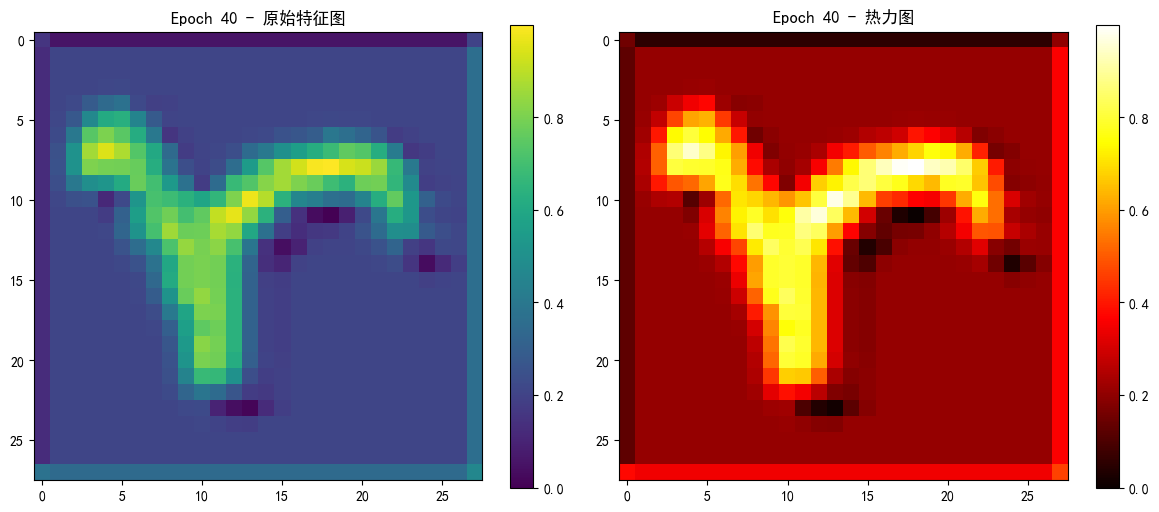

🖼️ 特征图已保存到: runs/20250426_153206\feature_map_epoch_40.png
Epoch 41/500: Train Loss: 0.2536 | Val Loss: 0.2847 | Train Top-1: 0.9227 | Val Top-1: 0.9090 | Train Top-3: 0.9904 | Val Top-3: 0.9868
🎯 新最佳模型 (准确率: 0.9108) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 42/500: Train Loss: 0.2510 | Val Loss: 0.2764 | Train Top-1: 0.9230 | Val Top-1: 0.9108 | Train Top-3: 0.9909 | Val Top-3: 0.9879
🎯 新最佳模型 (准确率: 0.9110) 已保存到 cnn_res_attention_noaug_best.pth
Epoch 43/500: Train Loss: 0.2467 | Val Loss: 0.2740 | Train Top-1: 0.9266 | Val Top-1: 0.9110 | Train Top-3: 0.9909 | Val Top-3: 0.9870
Epoch 44/500: Train Loss: 0.2435 | Val Loss: 0.2779 | Train Top-1: 0.9236 | Val Top-1: 0.9097 | Train Top-3: 0.9911 | Val Top-3: 0.9865
Epoch 45/500: Train Loss: 0.2350 | Val Loss: 0.2851 | Train Top-1: 0.9277 | Val Top-1: 0.9085 | Train Top-3: 0.9921 | Val Top-3: 0.9858
Epoch 46/500: Train Loss: 0.2338 | Val Loss: 0.2771 | Train Top-1: 0.9256 | Val Top-1: 0.9059 | Train Top-3: 0.9926 | Val Top-3: 0.9876
Epoch 

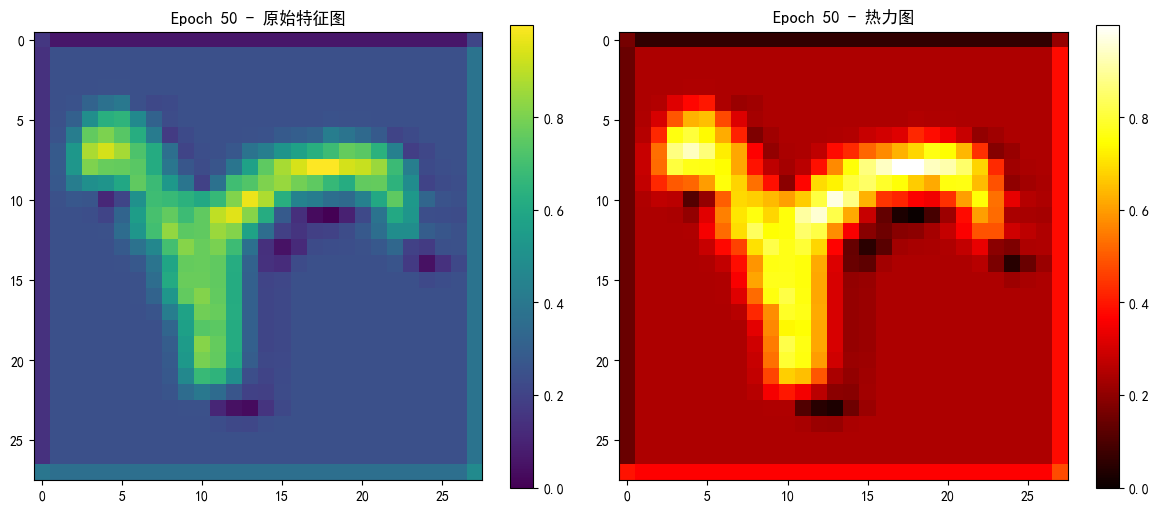

🖼️ 特征图已保存到: runs/20250426_153206\feature_map_epoch_50.png
Epoch 51/500: Train Loss: 0.2215 | Val Loss: 0.2732 | Train Top-1: 0.9291 | Val Top-1: 0.9106 | Train Top-3: 0.9928 | Val Top-3: 0.9868
Epoch 52/500: Train Loss: 0.2169 | Val Loss: 0.2779 | Train Top-1: 0.9303 | Val Top-1: 0.9094 | Train Top-3: 0.9934 | Val Top-3: 0.9874
⏹️ 早停触发: 验证准确率连续 10 轮未提升
✅ 特征图钩子已移除


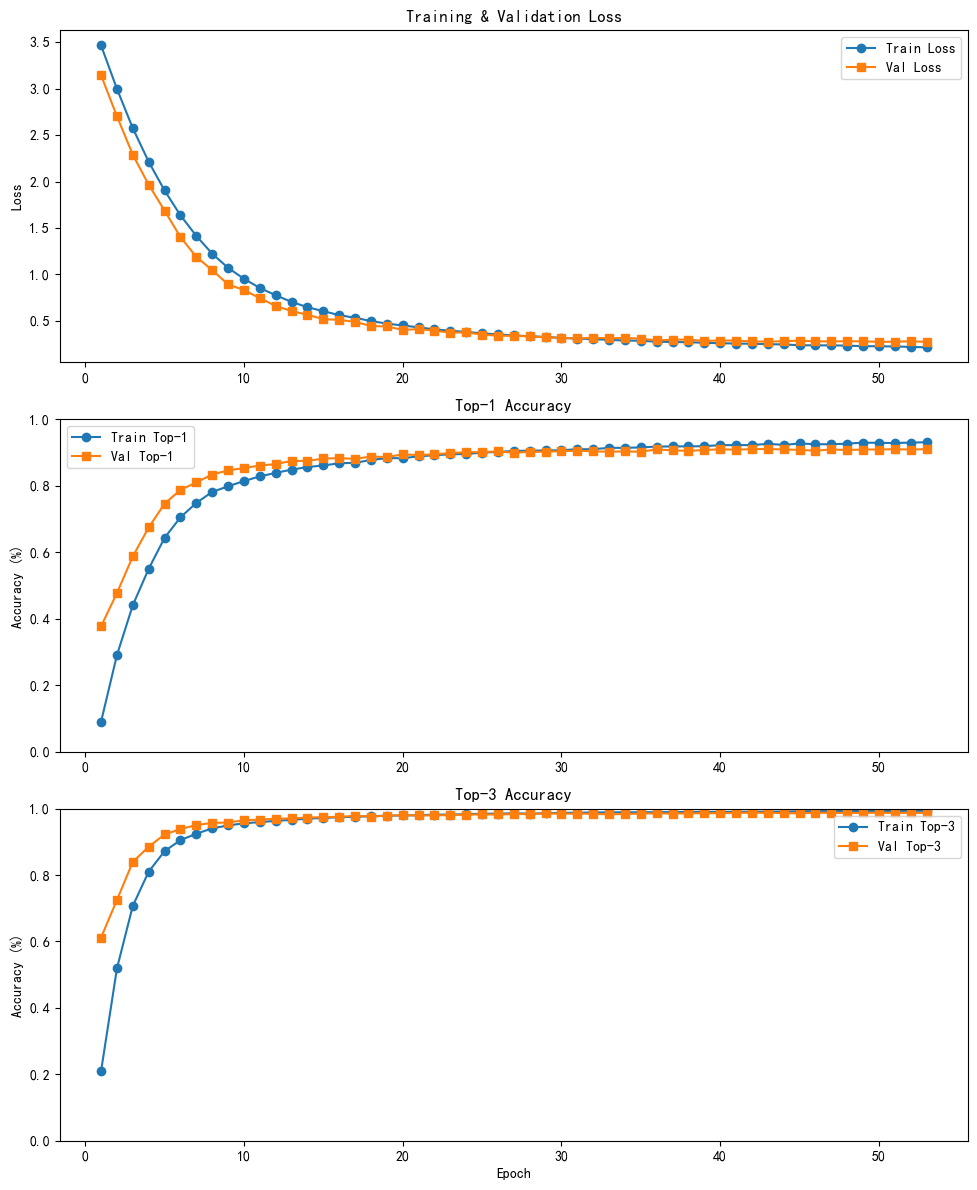

📊 训练图表已保存到: training_plots\training_metrics_20250426_154037.png


CNNModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (MaxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5):

In [41]:
CNNWithAttention_noBoost = CNNModel(label_num, use_attention=True) # 调用模型

train_and_validate(
    model=CNNWithAttention_noBoost,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_noaug_best.pth",
    lr=LR
)

### 模型结果

In [2]:
# 模型大小
model_size_CNNwithAttention = sum(p.numel() for p in CNNWithAttention.parameters())
model_size_CNNnoAttention = sum(p.numel() for p in CNNnoAttention.parameters())
model_size_CNNWithAttention_noBoost = sum(p.numel() for p in CNNWithAttention_noBoost.parameters())
# 打印模型大小
print(f"CNNWithAttention: {model_size_CNNwithAttention}")
print(f"CNNnoAttention: {model_size_CNNnoAttention}")
print(f"CNNWithAttention_noBoost: {model_size_CNNWithAttention_noBoost}")

model_sizes = [model_size_CNNwithAttention, model_size_CNNnoAttention, model_size_CNNWithAttention_noBoost]
model_names = ["CNNWithAttention", "CNNnoAttention", "CNNWithAttention_noBoost"]
top1_accs = []
top3_accs = []
f1s = []
precisions = []
recalls = []
inference_speeds = []
fps_values = []

NameError: name 'CNNWithAttention' is not defined

Confusion matrix, without normalization


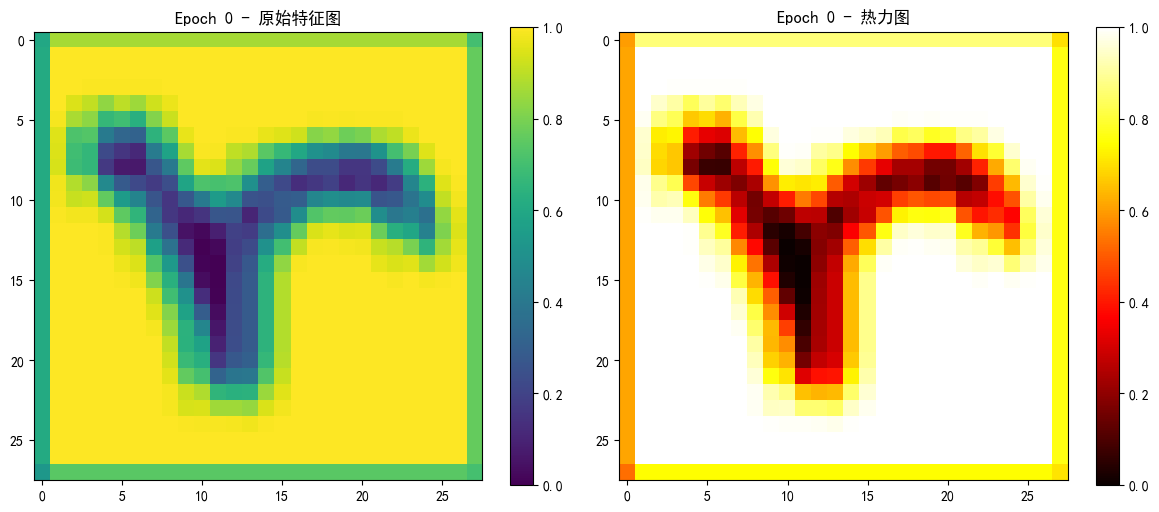

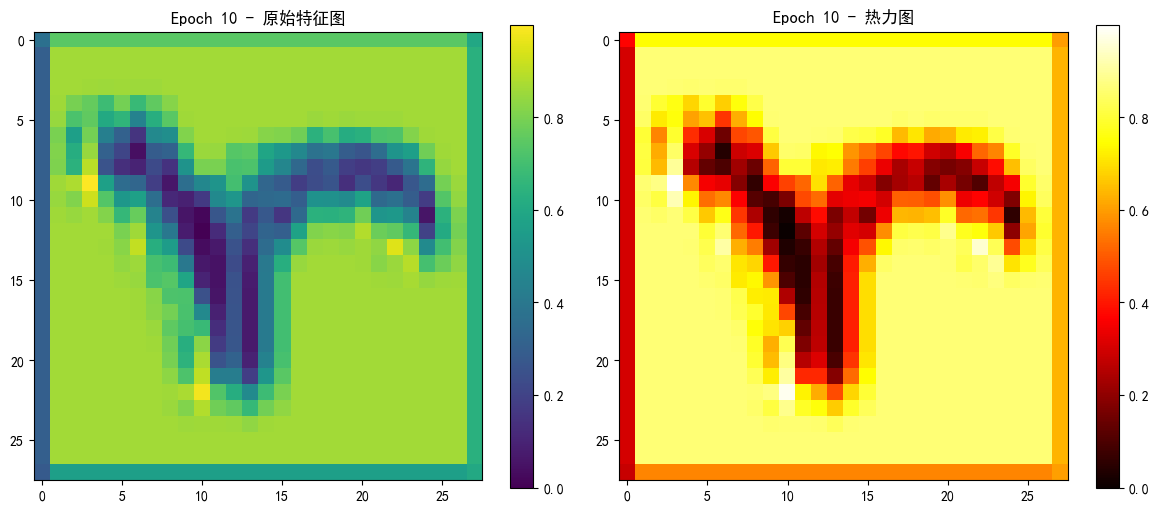

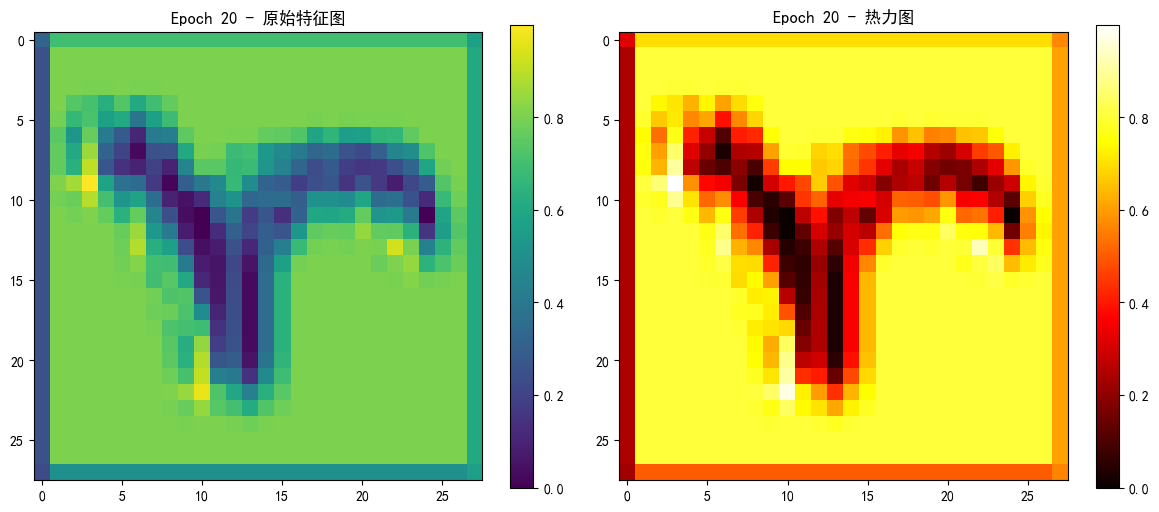

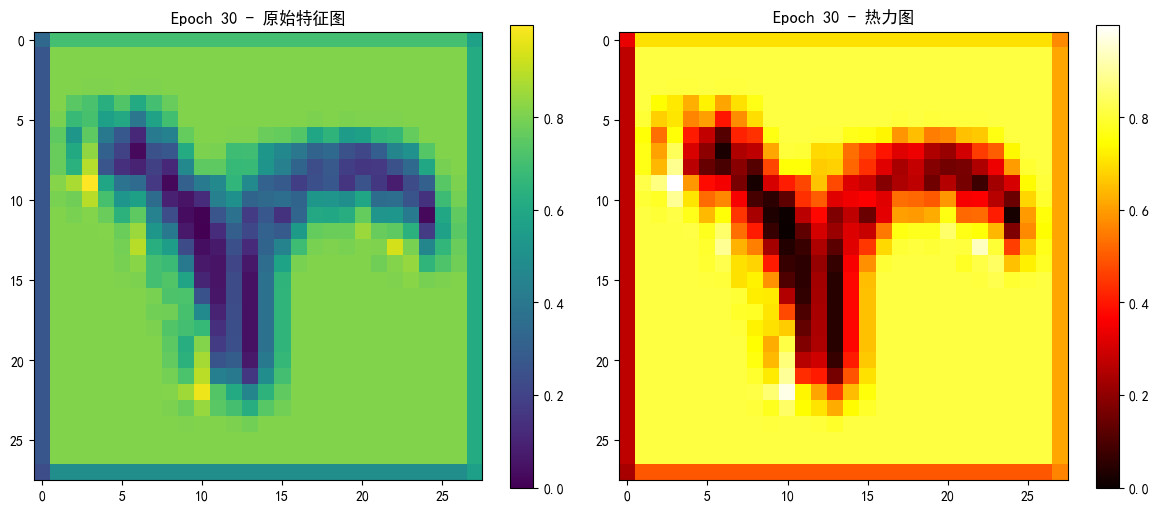

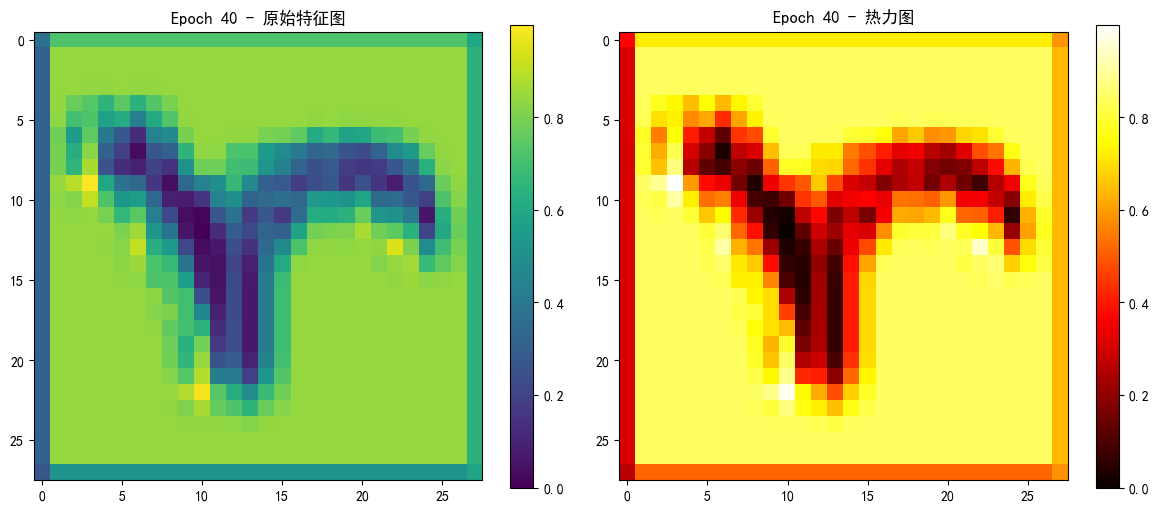

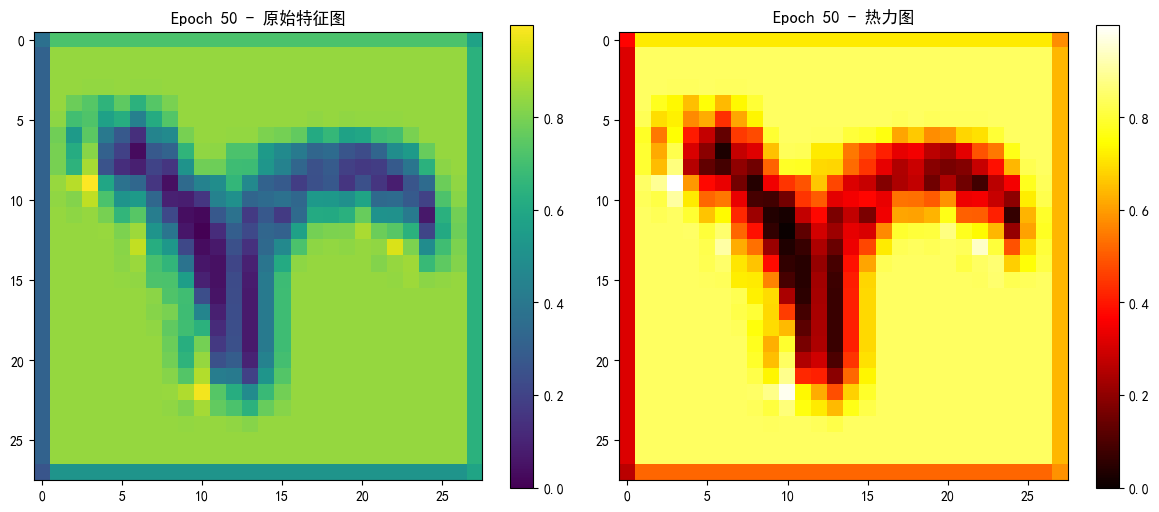

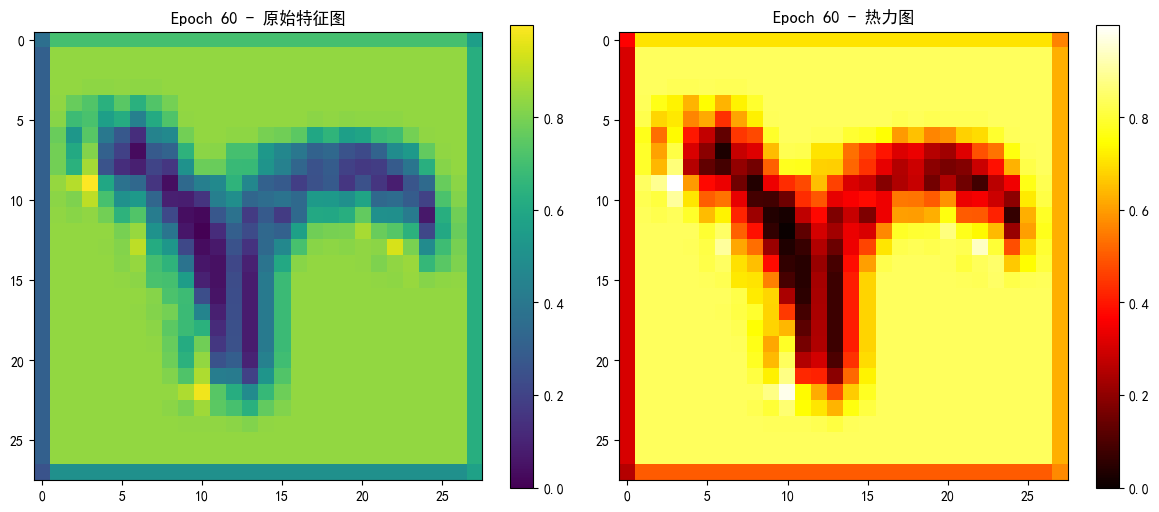

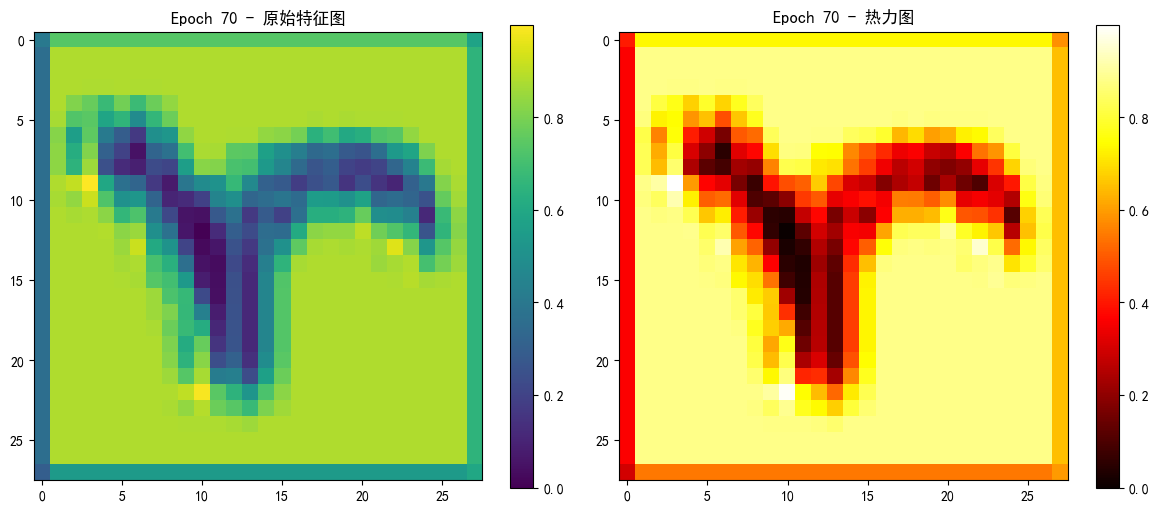

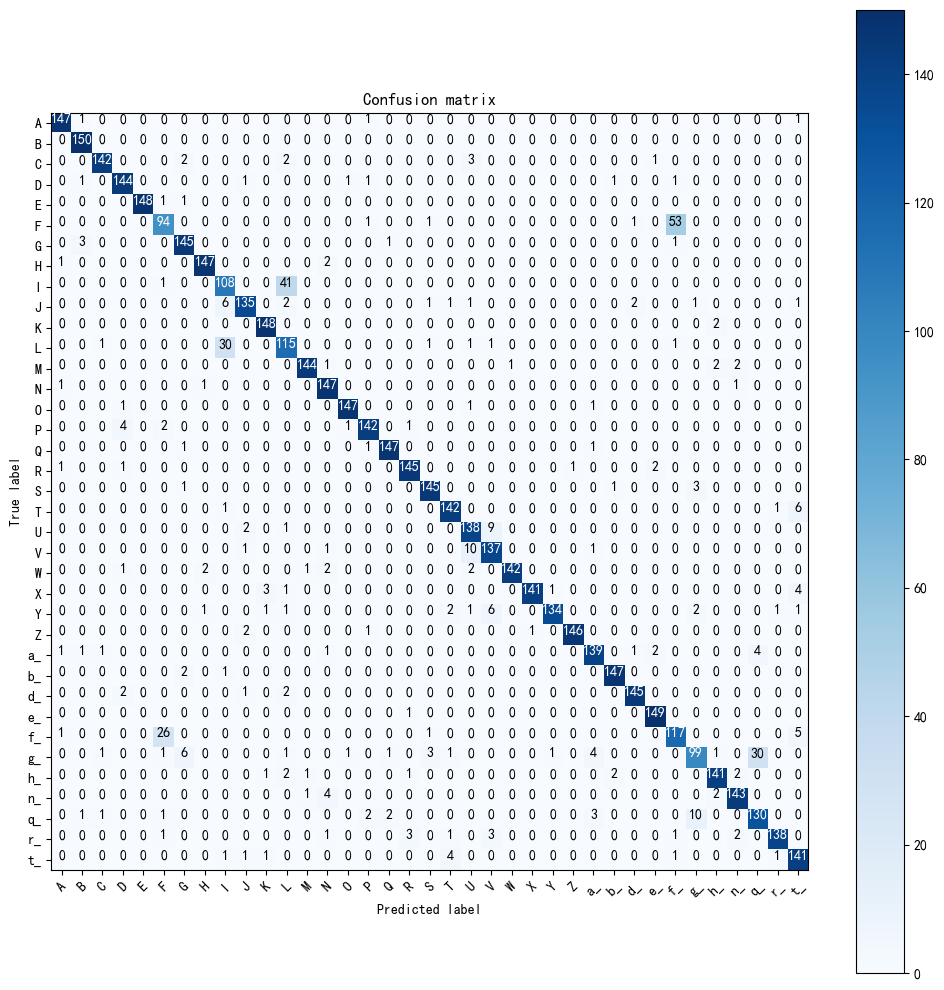

CNNWithAttention Evaluation:
Top-1 Accuracy: 92.0541
Top-3 Accuracy: 99.1351
F1 Score: 0.9204
Precision: 0.9222
Recall: 0.9205
Inference Speed: 0.0055 ms per sample


In [51]:
from myCnn.evaluate_model import evaluate_model

# 推理
top1_acc_CNNWithAttention, top3_acc_CNNWithAttention,f1_CNNWithAttention, precision_CNNWithAttention, recall_CNNWithAttention, inference_speed_CNNWithAttention = evaluate_model(
    CNNWithAttention, test_loader1, device)

top1_accs.append(top1_acc_CNNWithAttention)
top3_accs.append(top3_acc_CNNWithAttention)
f1s.append(f1_CNNWithAttention)
inference_speeds.append(inference_speed_CNNWithAttention)
fps_values.append(1/inference_speed_CNNWithAttention)

print("CNNWithAttention Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNWithAttention:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNWithAttention:.4f}")
print(f"F1 Score: {f1_CNNWithAttention:.4f}")
print(f"Precision: {precision_CNNWithAttention:.4f}")
print(f"Recall: {recall_CNNWithAttention:.4f}")
print(f"Inference Speed: {inference_speed_CNNWithAttention * 1000:.4f} ms per sample")


Confusion matrix, without normalization


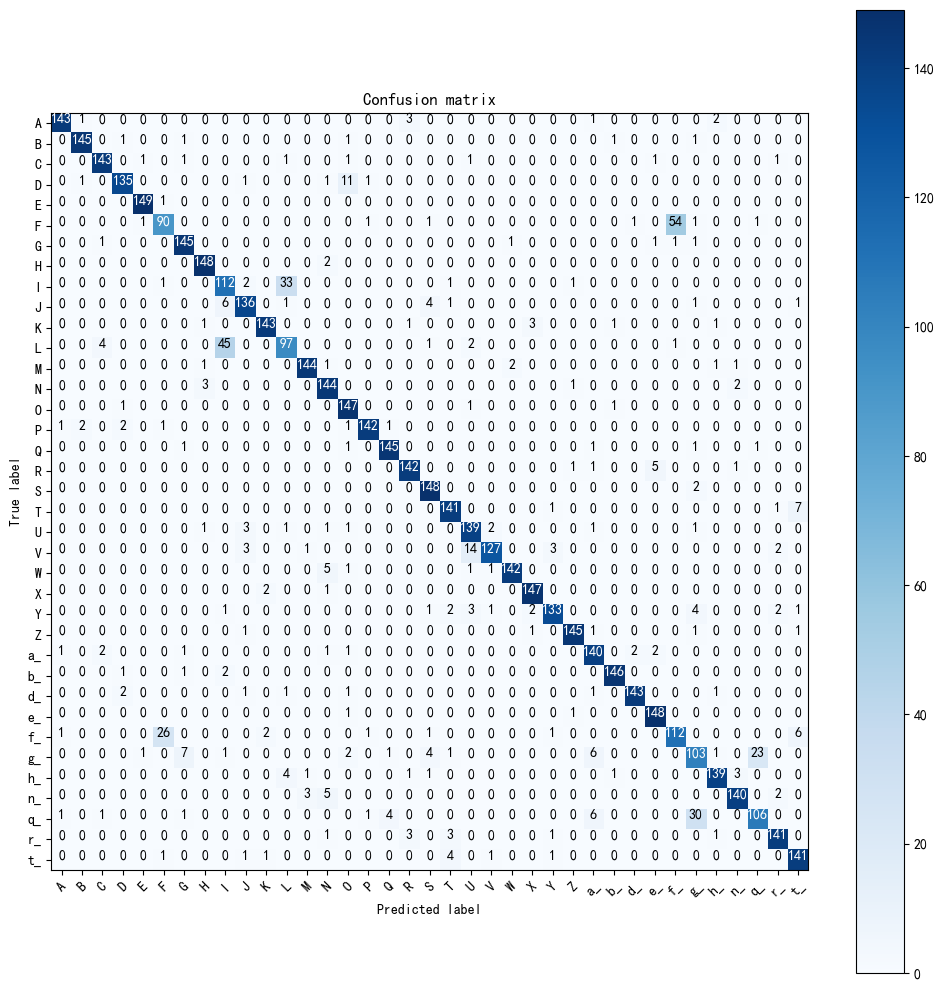

CNNnoAttention Evaluation:
Top-1 Accuracy: 90.6486
Top-3 Accuracy: 98.7928
F1 Score: 0.9058
Precision: 0.9070
Recall: 0.9065
Inference Speed: 0.0035 ms per sample


In [52]:
top1_acc_CNNnoAttention, top3_acc_CNNnoAttention, f1_CNNnoAttention, precision_CNNnoAttention, recall_CNNnoAttention,  inference_speed_CNNnoAttention = evaluate_model(
    CNNnoAttention, test_loader1, device)

top1_accs.append(top1_acc_CNNnoAttention)
top3_accs.append(top3_acc_CNNnoAttention)
f1s.append(f1_CNNnoAttention)
inference_speeds.append(inference_speed_CNNnoAttention)
fps_values.append(1/inference_speed_CNNnoAttention)

print("CNNnoAttention Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNnoAttention:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNnoAttention:.4f}")
print(f"F1 Score: {f1_CNNnoAttention:.4f}")
print(f"Precision: {precision_CNNnoAttention:.4f}")
print(f"Recall: {recall_CNNnoAttention:.4f}")
print(f"Inference Speed: {inference_speed_CNNnoAttention * 1000:.4f} ms per sample")

Confusion matrix, without normalization


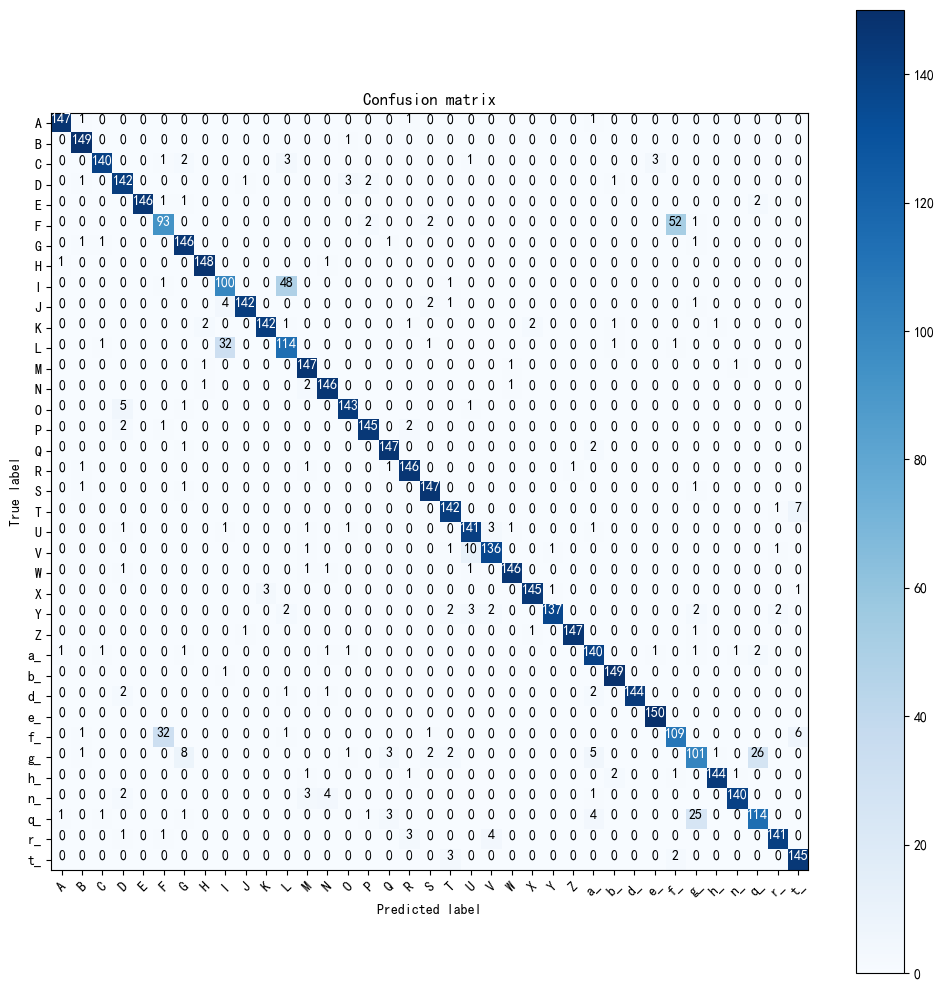

CNNWithAttention_noBoost Evaluation:
Top-1 Accuracy: 91.9099
Top-3 Accuracy: 98.9550
F1 Score: 0.9187
Precision: 0.9195
Recall: 0.9191
Inference Speed: 0.0043 ms per sample


In [53]:
top1_acc_CNNWithAttention_noBoost, top3_acc_CNNWithAttention_noBoost, f1_CNNWithAttention_noBoost, precision_CNNWithAttention_noBoost, recall_CNNWithAttention_noBoost, inference_speed_CNNWithAttention_noBoost = evaluate_model(CNNWithAttention_noBoost, test_loader2, device)

top1_accs.append(top1_acc_CNNWithAttention_noBoost)
top3_accs.append(top3_acc_CNNWithAttention_noBoost)
f1s.append(f1_CNNWithAttention_noBoost)
inference_speeds.append(inference_speed_CNNWithAttention_noBoost)
fps_values.append(1/inference_speed_CNNWithAttention_noBoost)

print("CNNWithAttention_noBoost Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNWithAttention_noBoost:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNWithAttention_noBoost:.4f}")
print(f"F1 Score: {f1_CNNWithAttention_noBoost:.4f}")
print(f"Precision: {precision_CNNWithAttention_noBoost:.4f}")
print(f"Recall: {recall_CNNWithAttention_noBoost:.4f}")
print(f"Inference Speed: {inference_speed_CNNWithAttention_noBoost * 1000:.4f} ms per sample")

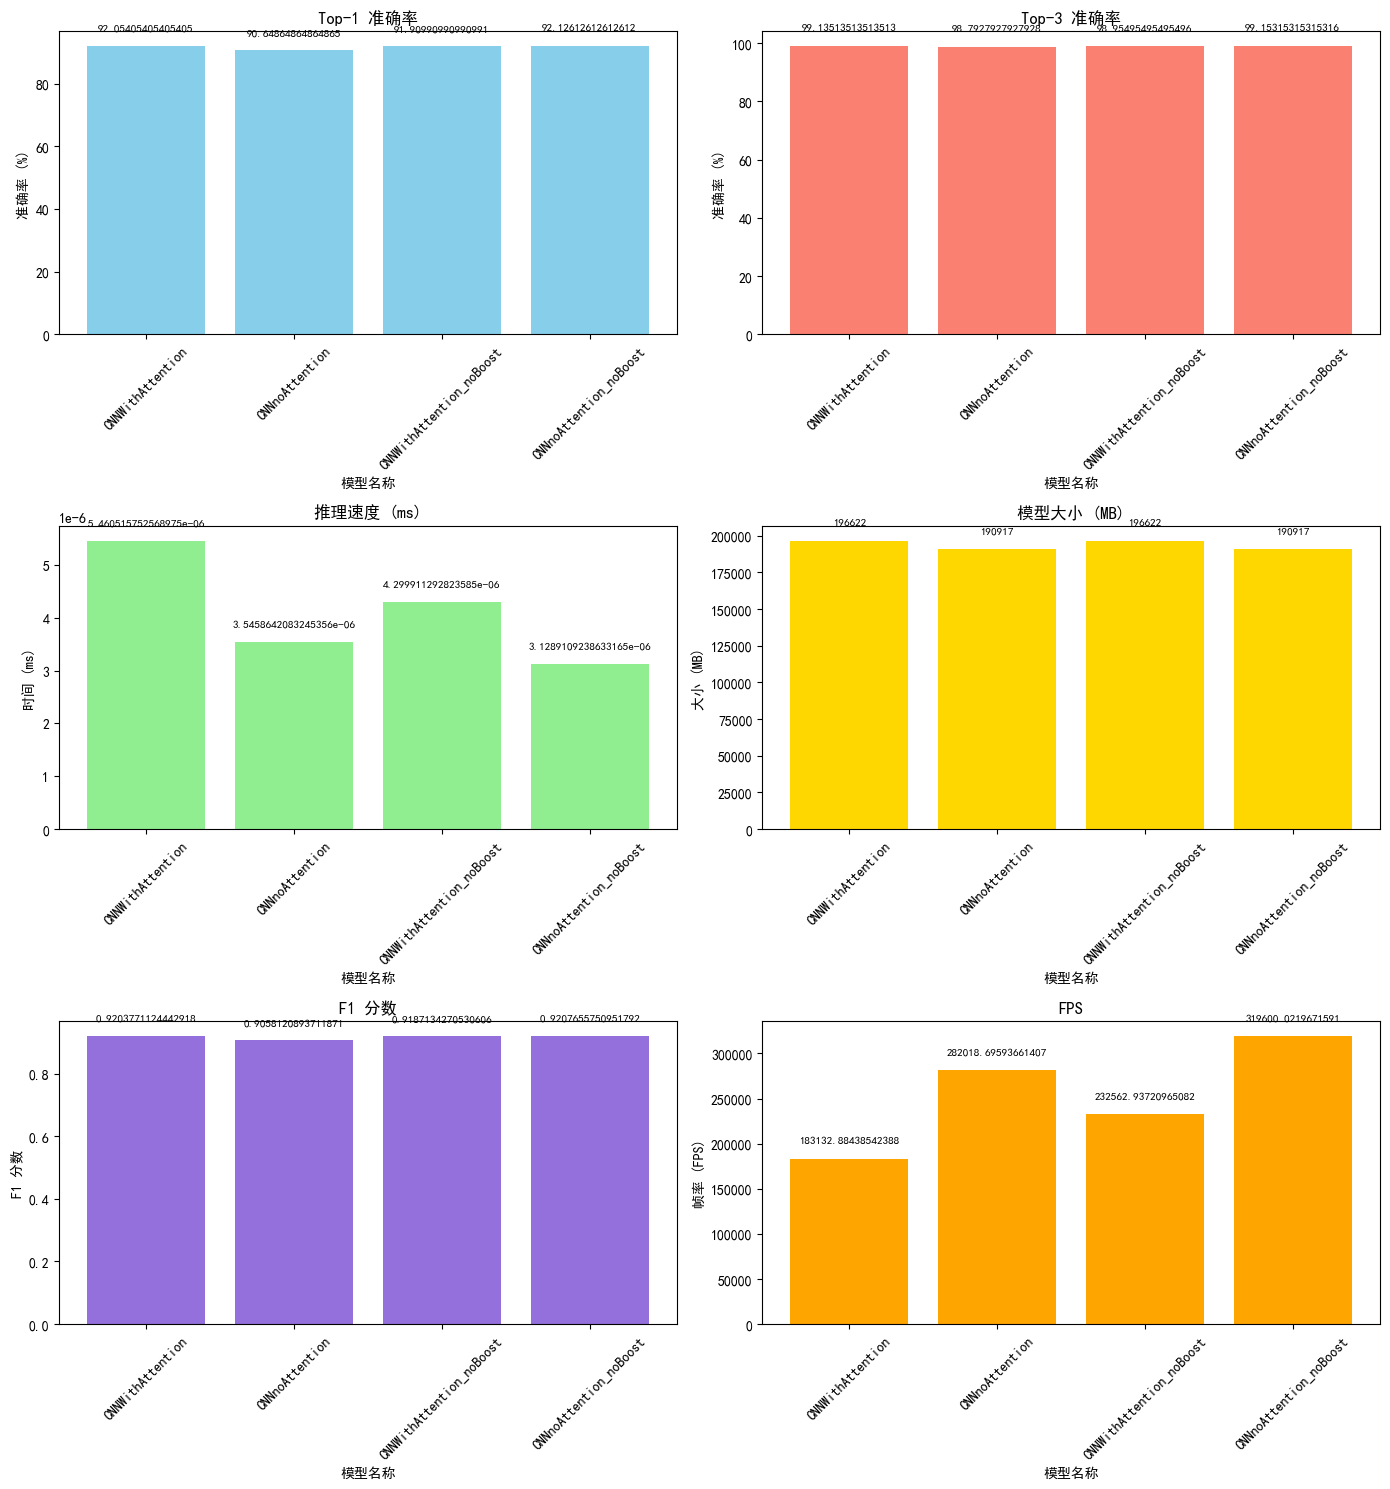

In [55]:
from myCnn.utils import plot_comparison

plot_comparison(model_names = model_names,
                top1_accs = top1_accs,
                top3_accs = top3_accs,
                inference_speeds = inference_speeds,
                model_sizes = model_sizes,
                f1_scores = f1s,
                fps_values = fps_values,)